## **Checking INITIAL Distribution of Classes**

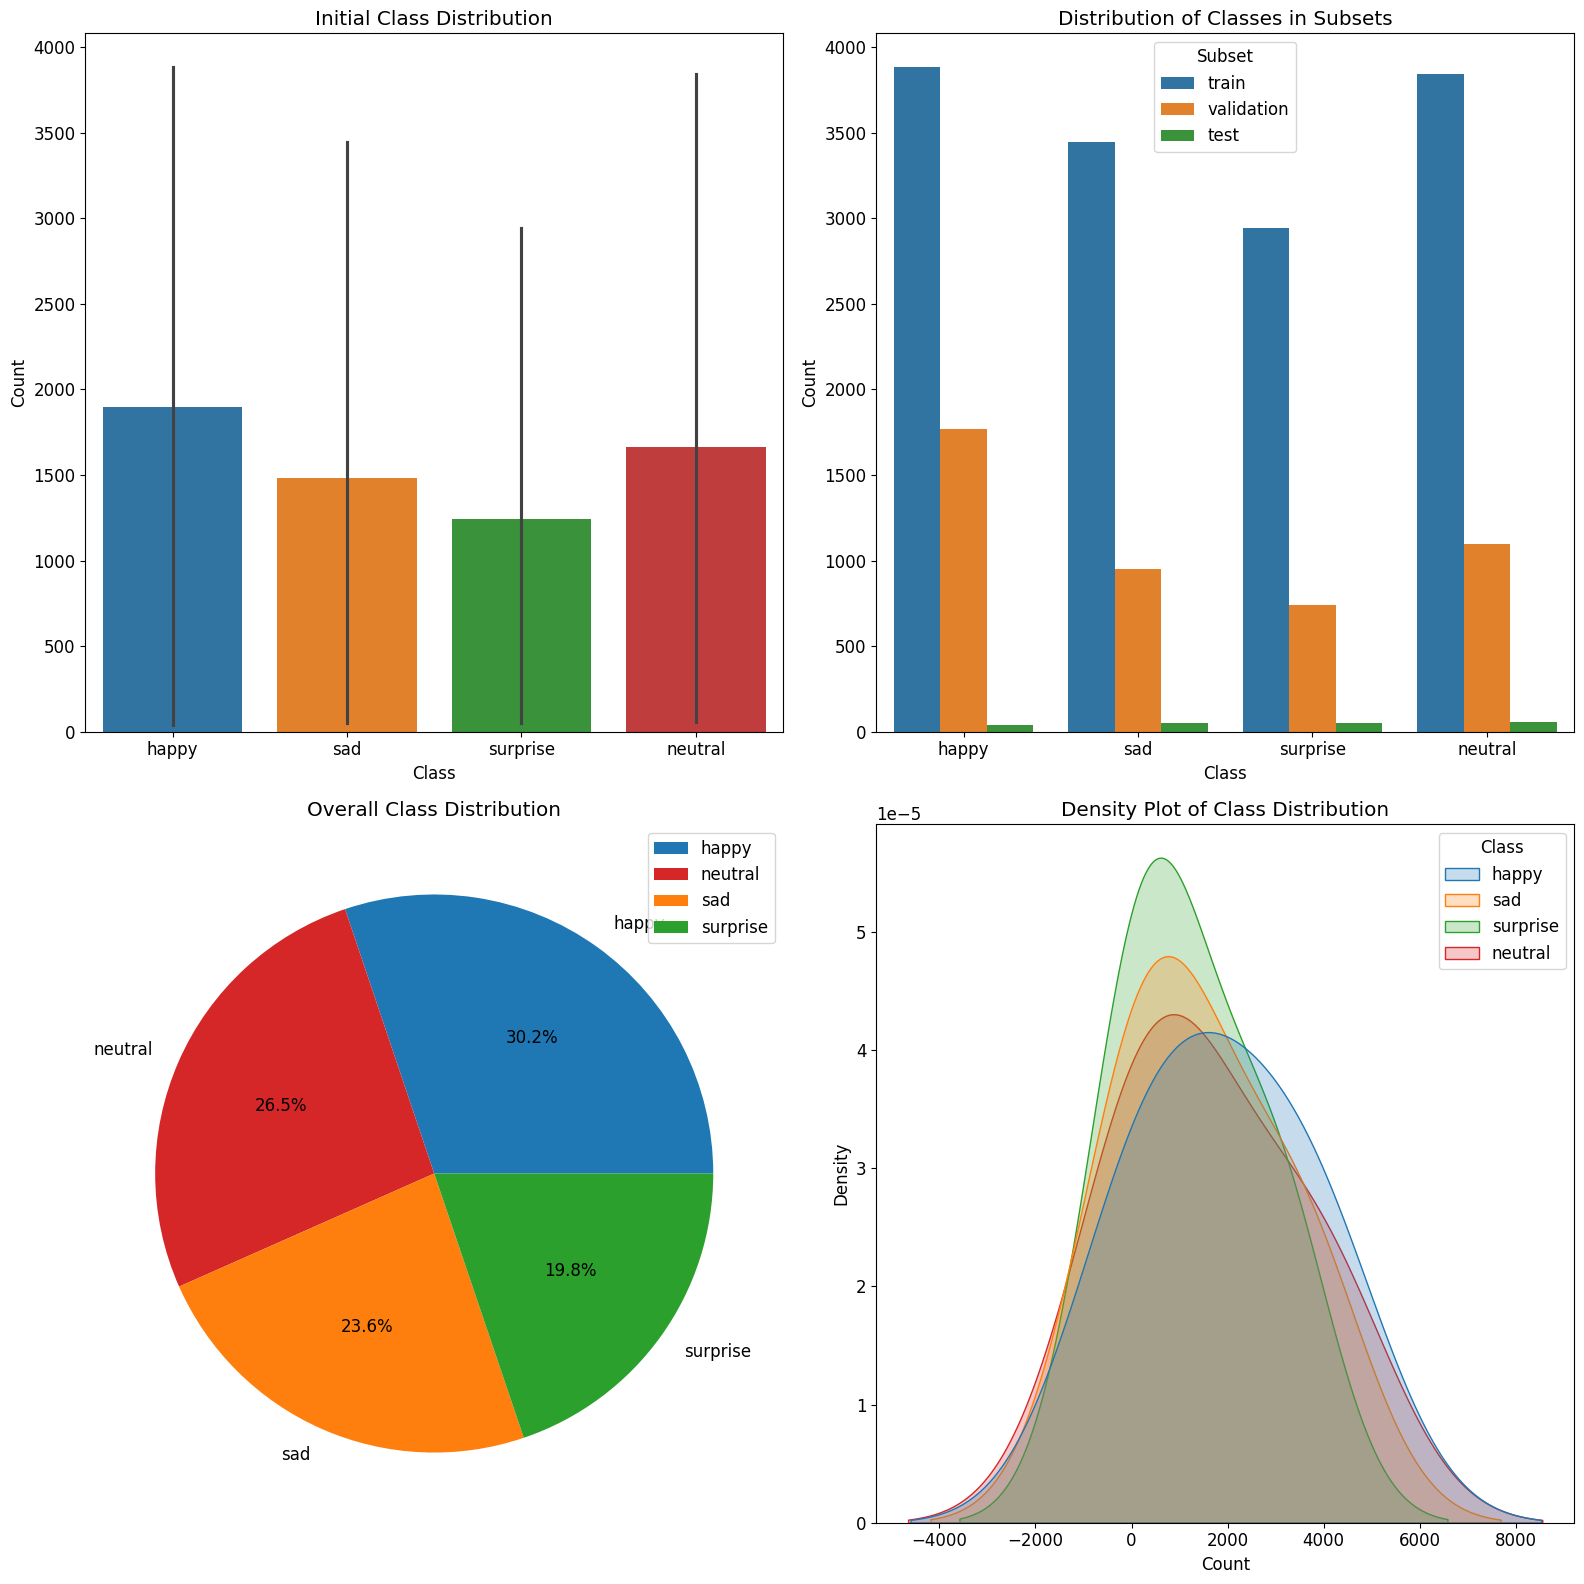


📈 STATISTICAL ANALYSIS 📈
   Class  Mean Count  Median Count  Std Deviation
   happy 1897.666667        1768.0    1925.776813
     sad 1481.666667         948.0    1759.291429
surprise 1245.000000         742.0    1508.753459
 neutral 1664.333333        1094.0    1954.925148

📊 CLASS DISTRIBUTION SUMMARY:

TRAIN SET DISTRIBUTION:
 - Happy     : 3885
 - Sad       : 3446
 - Surprise  : 2941
 - Neutral   : 3841

VALIDATION SET DISTRIBUTION:
 - Happy     : 1768
 - Sad       :  948
 - Surprise  :  742
 - Neutral   : 1094

TEST SET DISTRIBUTION:
 - Happy     :   40
 - Sad       :   51
 - Surprise  :   52
 - Neutral   :   58



In [14]:
# Set global aesthetics for plots
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

# Initialize class_counts with nested dictionaries
class_counts = {subset: {class_name: 0 for class_name in classes} for subset in subsets}

# Generate a custom Seaborn color palette
custom_palette = sns.color_palette("tab10")  # Use "tab20" for more than 10 categories

# Set the custom palette as the default for all Seaborn plots
sns.set_palette(custom_palette)

# Populate class_counts with the actual counts from the dataset directory
for subset in subsets:
    for class_name in classes:
        path = os.path.join(dataset_path, subset, class_name)
        class_counts[subset][class_name] = len([item for item in os.listdir(path) if os.path.isfile(os.path.join(path, item))])

# Convert class_counts to DataFrame for visualization
df_visualization = pd.DataFrame([
    {'Subset': subset, 'Class': class_name, 'Count': count}
    for subset, counts in class_counts.items() for class_name, count in counts.items()
])

# Statistical Analysis - Calculate mean, median, and standard deviation for each class across subsets
stats_data = {class_name: [class_counts[subset][class_name] for subset in subsets] for class_name in classes}
stats_df = pd.DataFrame([
    {
        'Class': class_name,
        'Mean Count': np.mean(counts),
        'Median Count': np.median(counts),
        'Std Deviation': np.std(counts, ddof=1)  # Using sample standard deviation
    } for class_name, counts in stats_data.items()
])

# Visualization - Combine all plots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 16))


# Bar plot for initial class distribution across all subsets combined
sns.barplot(data=df_visualization, x='Class', y='Count', hue='Class', legend=False, ax=axes[0, 0])
axes[0, 0].set_title('Initial Class Distribution')

# Bar plot with subsets for class distribution
sns.barplot(data=df_visualization, x='Class', y='Count', hue='Subset', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Classes in Subsets')


# Custom color Pallete For Pie Chart: assume 'unique_classes' contains the classes in the order they appear in the bar plot
unique_classes = df_visualization['Class'].unique()

# Generate a color palette with enough colors for each class
palette = sns.color_palette("tab10", n_colors=len(unique_classes))

# Create a mapping of class to color
color_mapping = {class_name: color for class_name, color in zip(unique_classes, palette)}

# Summing counts for each class for the pie chart
class_counts_sum = df_visualization.groupby('Class')['Count'].sum()

# Extract the colors for each class in the same order as they appear in 'class_counts_sum'
colors_for_pie = [color_mapping[class_name] for class_name in class_counts_sum.index]

# Plotting the pie chart with the specified colors
class_counts_sum.plot(kind='pie', autopct='%1.1f%%', colors=colors_for_pie, ax=axes[1, 0], legend=True)
axes[1, 0].set_title('Overall Class Distribution')
axes[1, 0].set_ylabel('')  


# Density plot for class distribution
sns.kdeplot(data=df_visualization, x='Count', hue='Class', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Density Plot of Class Distribution')

plt.tight_layout()
plt.show()

# Dynamically print Statistical Analysis
print("\n📈 STATISTICAL ANALYSIS 📈")
print(stats_df.to_string(index=False))

# Dynamically print Class Distribution Summary
print("\n📊 CLASS DISTRIBUTION SUMMARY:\n")
for subset, counts in class_counts.items():
    print(f"{subset.upper()} SET DISTRIBUTION:")
    for class_name, count in counts.items():
        print(f" - {class_name.title().ljust(10)}: {str(count).rjust(4)}")
    print()

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

**Think About It:**

- Are the classes distributed evenly across the subsets?
- Is the imbalance significant, and could it pose a problem as we progress?
- What Exploratory Data Analysis tasks could we undertake here for meaningful insights?

**Observations and Insights:**

The distribution of classes varies across the subsets, indicating an imbalance.

**OBSERVATIONS:**

- **Training Set:** The 'Happy', 'Sad', and 'Neutral' categories each have a substantial number of images, while the 'Surprise' category has noticeably fewer.
- **Test Set:** This subset shows a more balanced distribution among the classes.
- **Validation Set:** Here, we see the most significant variance in distribution, with 'Happy' having the highest number of images and 'Surprise' the fewest.
- **NON-FACE IMAGES:** During the review of various visualizations, some images were identified that did not feature a face, indicating noise in the dataset from mislabeled images or irrelevant content. Efforts were made to remove these to enhance data quality, despite constraints on time and resources.

**INSIGHTS:**

There's a notable imbalance in the training set, particularly affecting the 'Surprise' category, and a pronounced discrepancy in the validation set between 'Happy' and 'Surprise'. This imbalance could lead to model bias, favoring more represented classes, and potentially impairing performance on less represented classes.

- **Bias in Model:** There's a risk of the model developing a bias towards classes that are more frequently represented.
- **Overfitting:** The majority classes might lead to overfitting, with poorer generalization on minority classes.
- **Performance Metrics:** Standard metrics like accuracy might not fully capture the effects of class imbalance.

**CONCLUSIONS:**

The imbalance, especially notable in the 'Surprise' category within the training set, might lead to model bias and underperformance on this class. This issue warrants attention and possibly corrective measures.

**Exploratory Data Analysis Tasks to Consider:**
yorrecting mislabeled images could enhance overall model accuracy.
- **Pattern Identification:** Identifying patterns in frequently mislabeled images may inform adjustments in preprocessing or model configuration.
- **Preprocessing Techniques:** Examining pixel intensity distributions or color histograms could reveal if techniques like histogram equalization would benefit model performance.
- **Feature Extraction:** Applying techniques to reduce dimensionality and highlight distinguishing features between classes.
- **Class Separability Analysis:** Using methods like t-SNE or UMAP to visualize class separation in feature space, offering insights into class distinguishability.

**Adjusting for Imbalance:**

- **Implementing Class Weights:** Adjusting model training to emphasize minority classes. I've increased the class weights for the Surpise class in most models.
- **Using Informative Metrics:** Employing metrics like the F1-score or confusion matrices for a clearer view of class imbalances.
- **Data Augmentation:** Enhancing the representation of 'Surprise' through techniques like resampling or generating synthetic samples.
- **Feature Engineering:** Identifying and augmenting specific features unique to minority classes to improve model learning.


### **HISTOGRAPH EQUALIZATION ON BASE DATASET**

Processing train/happy:   0%|          | 0/3885 [00:00<?, ?it/s]

Processing train/sad:   0%|          | 0/3446 [00:00<?, ?it/s]

Processing train/surprise:   0%|          | 0/2941 [00:00<?, ?it/s]

Processing train/neutral:   0%|          | 0/3841 [00:00<?, ?it/s]

Processing validation/happy:   0%|          | 0/1768 [00:00<?, ?it/s]

Processing validation/sad:   0%|          | 0/948 [00:00<?, ?it/s]

Processing validation/surprise:   0%|          | 0/742 [00:00<?, ?it/s]

Processing validation/neutral:   0%|          | 0/1094 [00:00<?, ?it/s]

Processing test/happy:   0%|          | 0/40 [00:00<?, ?it/s]

Processing test/sad:   0%|          | 0/51 [00:00<?, ?it/s]

Processing test/surprise:   0%|          | 0/52 [00:00<?, ?it/s]

Processing test/neutral:   0%|          | 0/58 [00:00<?, ?it/s]

Processing complete.
Total deleted images logged: 41
Summary of Histogram Adjustments:
    Subset    Class  Count
      test    happy     40
      test  neutral     58
      test      sad     50
      test surprise     52
     train    happy   3885
     train  neutral   3835
     train      sad   3445
     train surprise   2921
validation    happy   1763
validation  neutral   1093
validation      sad    948
validation surprise    735

Deleted Images Summary:
    Subset    Class  Deleted Count
      test      sad              1
     train  neutral              6
     train      sad              1
     train surprise             20
validation    happy              5
validation  neutral              1
validation surprise              7
Processing complete.



DELETED IMAGES FROM HISTOGRAM CHECK:




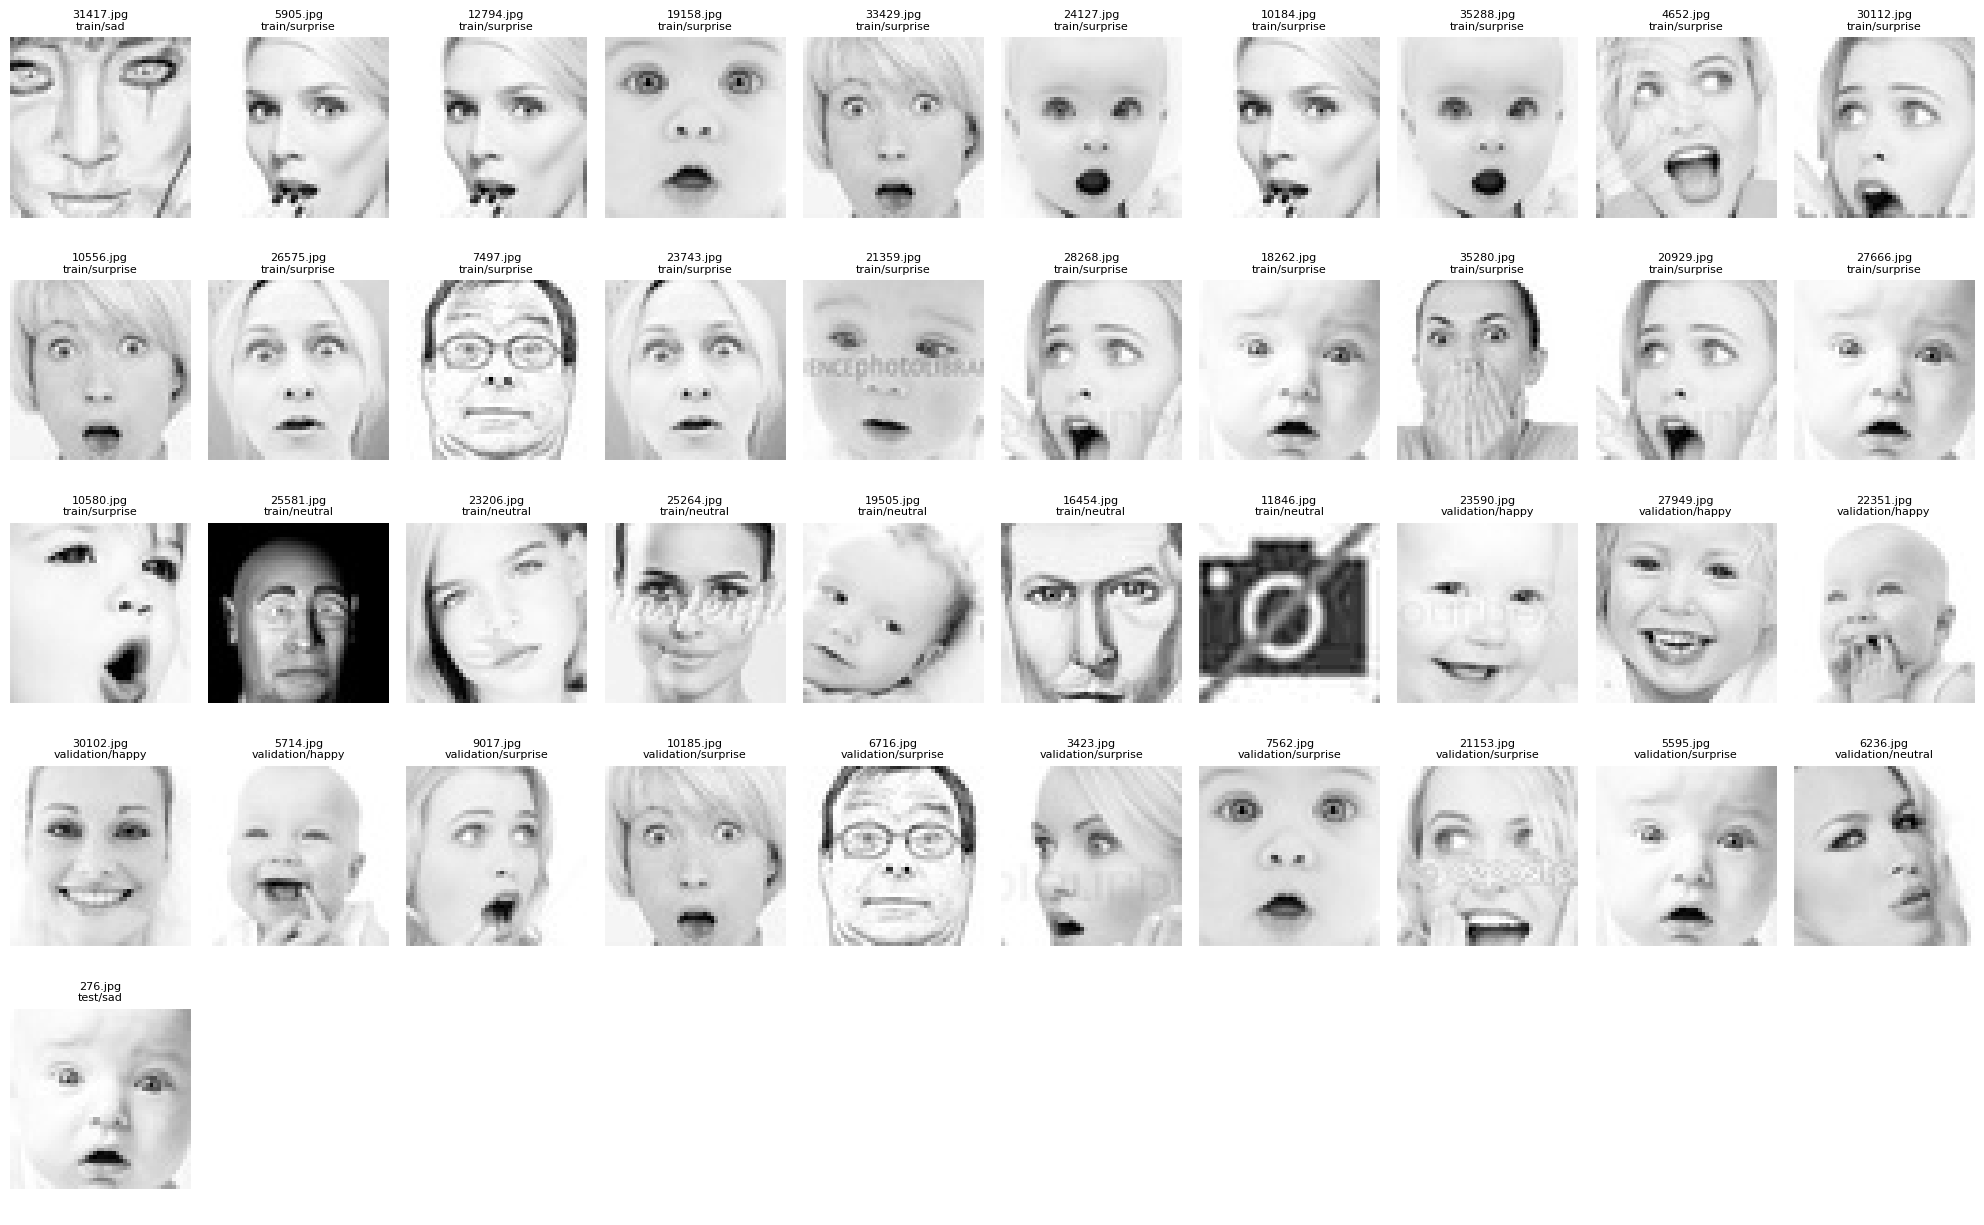

In [15]:
# Defining Logging, Paths, DataFrame & Verbosity
# Suppress verbose TensorFlow warnings for cleaner output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf  # Import TensorFlow for potential image processing tasks
tf.get_logger().setLevel('INFO')  # Set TensorFlow logger to display only INFO level messages

# Define global paths for dataset and processed images
dataset_path = os.path.join(root_path, 'dataset', 'Facial_emotion_images')  # Path to the original dataset

# Paths for processed images and logs
adjusted_histogram_dir = os.path.join(root_path, 'adjusted_histogram')  # Directory for images after histogram adjustment
deleted_histogram_dir = os.path.join(root_path, 'deleted_histogram')  # Directory for deleted images based on quality checks
adjusted_log_file_path = os.path.join(root_path, 'adjusted_histogram_log.csv')  # Log file for adjusted images
deleted_log_file_path = os.path.join(root_path, 'deleted_images_log.csv')  # Log file for deleted images

# Ensure the necessary directories exist
os.makedirs(adjusted_histogram_dir, exist_ok=True)
os.makedirs(deleted_histogram_dir, exist_ok=True)

# Setup logging with a custom handler to integrate with tqdm for progress bars
def setup_logging():
    class TqdmLoggingHandler(logging.Handler):  # Custom logging handler class
        def emit(self, record):  # Override the emit method to write messages
            try:
                msg = self.format(record)  # Format the log message
                tqdm.write(msg)  # Write the message using tqdm to avoid interrupting progress bars
            except Exception:
                self.handleError(record)  # Handle any errors in logging

    # Configure the root logger for the application
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
    logger = logging.getLogger()  # Get the root logger
    for handler in logger.handlers[:]:  # Remove existing handlers to avoid duplicate logging
        logger.removeHandler(handler)
    logger.addHandler(TqdmLoggingHandler())  # Add the custom handler to the logger
    return logger
 
logger = setup_logging()  # Initialize logging

# DataFrames for logging the processing results
adjusted_images_log = pd.DataFrame(columns=['Subset', 'Class', 'Original_Image', 'Adjusted_Image', 'Adjustment'])  # Log for adjusted images
deleted_images_log = pd.DataFrame(columns=['Subset', 'Class', 'Original_Image', 'Reason', 'Source_Path', 'Destination_Path'])  # Log for deleted images
  # Log for deleted images


# ------------------
# --- FUNCTIONS  ---
# ------------------ 


# Define function to adjust image histogram and save adjusted image.
def adjust_histogram(image_path, dest_dir, clip_limit, kernel_size):
    # Read image in grayscale and convert to float.
    image = io.imread(image_path, as_gray=True)
    image = img_as_float(image)
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization).
    image_adj = exposure.equalize_adapthist(image, clip_limit=clip_limit, kernel_size=kernel_size)
    # Smooth image with Gaussian filter.
    image_smoothed = gaussian(image_adj, sigma=.3)
    # Sharpening
    # Calculate the unsharp mask
    sigma_for_sharpening = .3  # Sigma for blurring the image for the sharpening process
    amount = 6  # Amount for sharpening (scaled down for small images as requested)
    blurred_for_sharpening = gaussian(image_smoothed, sigma=sigma_for_sharpening)
    unsharp_mask = image_smoothed - blurred_for_sharpening
    # Apply unsharp mask to the smoothed image
    sharpened_image = image_smoothed + amount * unsharp_mask
    # Convert image back to 8-bit unsigned byte format.
    adjusted_image = img_as_ubyte(np.clip(sharpened_image, 0, 1))  # Ensure values are in the proper range
    # Save adjusted image to specified directory.
    adjusted_image_path = os.path.join(dest_dir, os.path.basename(image_path))
    io.imsave(adjusted_image_path, adjusted_image)
    return adjusted_image_path

# Define function to evaluate and process an image based on its brightness.
def evaluate_and_process_image(image_path, dest_dir, subset, class_name, clip_limit, kernel_size):
    # Check if image is too dark or light and process accordingly.
    if is_image_too_dark_or_light(image_path):
        # Move image to deleted directory if it doesn't meet criteria.
        deleted_image_path = move_to_deleted(image_path)
        # Log deletion, including source and destination paths.
        log_image_deletion(subset, class_name, os.path.basename(image_path), 'Low Contrast or Too Dark/Light', image_path, deleted_image_path)
    else:
        # If no histogram adjustment needed, the else part will not execute deletion logging.
        adjusted_image_path = adjust_histogram(image_path, dest_dir, clip_limit, kernel_size)
        # Log adjustment.
        log_image_adjustment(subset, class_name, os.path.basename(image_path), adjusted_image_path)

# Define function to determine if an image is too dark or light.
def is_image_too_dark_or_light(image_path, dark_threshold=.37, light_threshold=.78, pixel_value_threshold=.0000017):
    # Read image and normalize pixel values.
    image = io.imread(image_path)
    normalized_image = image / 255.0
    # Calculate ratio of dark and light pixels.
    dark_pixels_ratio = np.sum(normalized_image < pixel_value_threshold) / normalized_image.size
    light_pixels_ratio = np.sum(normalized_image > light_threshold) / normalized_image.size
    # Return true if image is too dark or too light based on thresholds.
    return dark_pixels_ratio > dark_threshold or light_pixels_ratio > light_threshold

# Define function to move an image to a "deleted" directory.
def move_to_deleted(image_path):
    # Construct path for deleted image in the designated directory.
    deleted_image_path = os.path.join(deleted_histogram_dir, os.path.basename(image_path))
    # Move image to the new path.
    os.rename(image_path, deleted_image_path)
    return deleted_image_path


# Define function to log the adjustment of an image.
def log_image_adjustment(subset, class_name, original_image, adjusted_image_path):
    # Append log entry to the DataFrame.
    adjusted_images_log.loc[len(adjusted_images_log)] = [subset, class_name, original_image, adjusted_image_path, 'CLAHE']


def log_image_deletion(subset, class_name, original_image, reason, source_path, destination_path):
    # Append log entry to the DataFrame.
    deleted_images_log.loc[len(deleted_images_log)] = {
        'Subset': subset,
        'Class': class_name,
        'Original_Image': original_image,
        'Reason': reason,
        'Source_Path': source_path,
        'Destination_Path': destination_path
    }
    

# Define main function to process image datasets.
def process_dataset(subset, class_names, clip_limit, kernel_size):
    # Iterate over specified class names within dataset subsets.
    for class_name in class_names:
        # Define source and destination directories for image processing.
        dir_path = os.path.join(dataset_path, subset, class_name)
        adjusted_dir = os.path.join(adjusted_histogram_dir, subset, class_name)
        # Create destination directory if it does not exist.
        os.makedirs(adjusted_dir, exist_ok=True)
        # List all image files in the source directory, excluding hidden files.
        image_files = [f for f in os.listdir(dir_path) if not f.startswith('.')]
        # Process each image file.
        for image_name in tqdm(image_files, desc=f'Processing {subset}/{class_name}'):
            image_path = os.path.join(dir_path, image_name)
            evaluate_and_process_image(image_path, adjusted_dir, subset, class_name, clip_limit, kernel_size)

# Function to display information about deleted images in a graphical format.
def display_deleted_images_with_info(deleted_images_log, directory, max_images=100):
    # Limit the number of images to display.
    displayed_images_log = deleted_images_log.head(max_images)
    num_images = len(displayed_images_log)
    # Return early if there are no deleted images to display.
    if num_images == 0:
        print("No deleted images to display.")
        return
    # Calculate the number of rows and columns for the display grid.
    cols = 10
    rows = (num_images + cols - 1) // cols
    # Initialize plot.
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 2.5 * rows))
    axes = axes.flatten()
    # Display each deleted image with associated info.
    for ax, (index, row) in zip(axes, displayed_images_log.iterrows()):
        img_path = os.path.join(directory, row['Original_Image'])
        img = io.imread(img_path)
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        title = f"{row['Original_Image']}\n{row['Subset']}/{row['Class']}"
        ax.set_title(title, fontsize=8)
    # Hide unused subplot areas.
    for ax in axes[num_images:]:
        ax.axis('off')
    plt.tight_layout()
    plt.show()


# ----------------------------
# --- MAIN PROCESSING LOOP ---
# ----------------------------

## Execute main function if script is run as the main program.
if __name__ == "__main__":
    # Specify class names and subsets for processing.
    class_names = ['happy', 'sad', 'surprise', 'neutral']
    for subset in ['train', 'validation', 'test']:
        process_dataset(subset, class_names, clip_limit=.01, kernel_size=(8, 8))

    # After processing all images, save the logs of adjustments and deletions to CSV files for record-keeping
    adjusted_images_log.to_csv(adjusted_log_file_path, index=False)  # Save adjustments log
    deleted_images_log.to_csv(deleted_log_file_path, index=False)  # Save deletions log

    # Log a message indicating that the processing is complete
    logger.info("Processing complete.")


# -------------------------------------------------
# ---  PRINT & LOG RESULTS & SUMMARY    ---
# -------------------------------------------------

# Print summary of histogram adjustments and deleted images
print(f"Total deleted images logged: {len(deleted_images_log)}")
print("Summary of Histogram Adjustments:")
summary = adjusted_images_log.groupby(['Subset', 'Class']).size().reset_index(name='Count')
print(summary.to_string(index=False))

if not deleted_images_log.empty:
    print("\nDeleted Images Summary:")
    deletion_summary = deleted_images_log.groupby(['Subset', 'Class']).size().reset_index(name='Deleted Count')
    print(deletion_summary.to_string(index=False))
else:
    print("\nNo images were deleted due to low contrast, darkness, or lightness.")

# Plot Deleted Histogram Images

logger.info("Processing complete.")
print()
print()
print()
print('DELETED IMAGES FROM HISTOGRAM CHECK:')
print()
print()
display_deleted_images_with_info(deleted_images_log, deleted_histogram_dir)

## **SCALE DATASET FOR 224x224 For Feature Extraction**

Scaling Images:   0%|          | 0/18825 [00:00<?, ?file/s]

Total images scaled: 18825


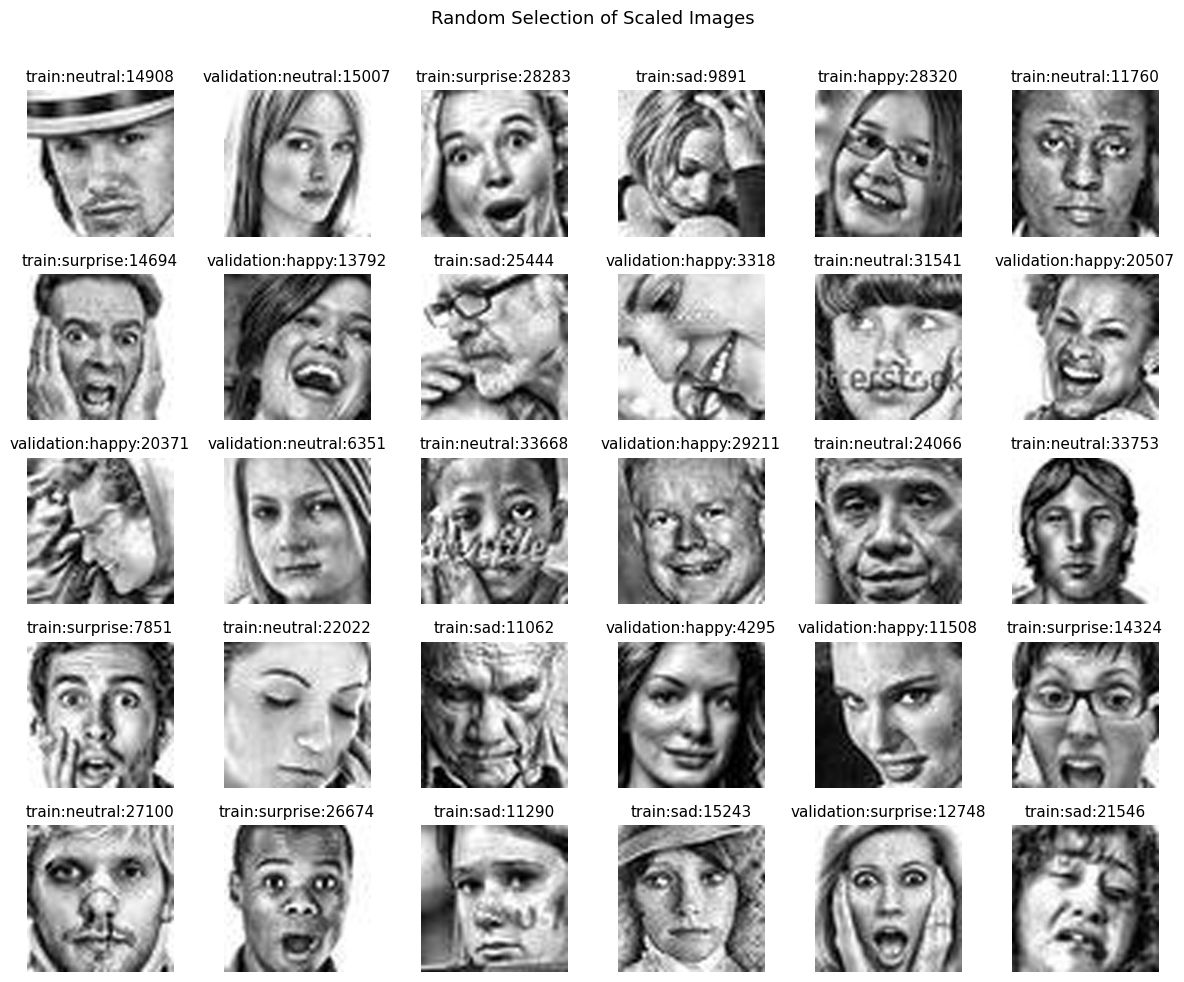

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.data import Dataset
import cv2
import os
from pathlib import Path
from tqdm import tqdm
import logging
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm.notebook import tqdm

# Paths for processed images and logs
original_dataset_path = adjusted_histogram_dir
scaled_dataset_path = os.path.join(root_path, 'scaled_dataset', 'Facial_emotion_images') # Input Directory using images after histogram adjustment


# Configure logger for monitoring
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def scale_images(original_dataset_path, scaled_dataset_path, target_size=(224, 224)):
    original_dataset_path = Path(original_dataset_path)
    scaled_dataset_path = Path(scaled_dataset_path)
    scaled_count = 0
    scaled_images_paths = []

    # Get the list of image paths
    image_paths = list(original_dataset_path.glob("**/*"))
    image_paths = [p for p in image_paths if p.is_file() and p.suffix.lower() in ['.jpg', '.jpeg', '.png']]

    # Initialize the progress bar using tqdm.notebook
    pbar = tqdm(total=len(image_paths), desc="Scaling Images", unit="file")

    for img_path in image_paths:
        try:
            img = cv2.imread(str(img_path))
            if img is None:
                raise ValueError(f"Failed to read image: {img_path}")
            resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_CUBIC)
            save_path = scaled_dataset_path / img_path.relative_to(original_dataset_path)
            save_path.parent.mkdir(parents=True, exist_ok=True)
            cv2.imwrite(str(save_path), resized_img)
            scaled_count += 1
            scaled_images_paths.append(save_path)
        except Exception as e:
            logger.warning(f"Error processing image {img_path}: {e}")
        finally:
            # Update the progress bar manually
            pbar.update(1)

    # Close the progress bar
    pbar.close()

    logger.info(f"Total images scaled: {scaled_count}")
    return scaled_images_paths

# Calling the function
scaled_images_paths = scale_images(original_dataset_path, scaled_dataset_path)

# Function to display a random selection of scaled images with modifications
def display_random_images(image_paths, num_images=30, images_per_row=6):  # Adjust default values here
    # Ensure the number of images does not exceed the total number of available paths or the maximum limit of 30
    num_images = min(num_images, len(image_paths))
    
    # Randomly select a subset of images
    selected_paths = random.sample(image_paths, num_images)
    
    # Calculate the number of rows needed, considering the new maximum of 30 images
    nrows = int(np.ceil(num_images / images_per_row))
    
    # Set the number of columns per row
    ncols = images_per_row
    
    # Create a matplotlib figure and axes with adjusted size for visibility
    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 2 * nrows))  # Adjust figure size as needed
    fig.suptitle('Random Selection of Scaled Images', fontsize=13)
    
    # Handle the case of a single row separately to avoid issues with axs indexing
    if nrows == 1:
        axs = np.array([axs])
    
    # Flatten the axes array for easy indexing
    axs = axs.flatten()
    
    for ax, img_path in zip(axs, selected_paths):
        # Read and plot each image
        img = plt.imread(str(img_path))
        ax.imshow(img)
        ax.axis('off')
        
        # Extract "subset:class:name" from the image path for displaying as title
        path_parts = Path(img_path).parts
        title = f"{path_parts[-3]}:{path_parts[-2]}:{Path(img_path).stem}"
        ax.set_title(title, fontsize=11)  # Adjust title fontsize as needed for readability
    
    # Hide any unused axes if the total number of images is not a perfect multiple of the number per row
    for ax in axs[len(selected_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust top margin to fit the subplot title
    plt.show()

# Call the modified display function
display_random_images(scaled_images_paths)


### Extract Features

In [17]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Model
from pathlib import Path
import numpy as np
from tqdm.notebook import tqdm
import faiss
import numpy as np
from pathlib import Path
from tqdm.notebook import tqdm

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Adjusted path to the dataset
scaled_dataset_path = "/home/myceliummind/Documents/Colab Capstone 1/scaled_dataset/Facial_emotion_images"

# Adjust the glob pattern to search recursively for JPG files
img_paths = [str(p) for p in Path(scaled_dataset_path).rglob("*.jpg")]

# Ensure img_paths is not empty
if not img_paths:
    raise ValueError(f"No images found in {scaled_dataset_path}. Please check the directory path.")
    
def preprocess_image(file_path):
    """
    TensorFlow graph-compatible image preprocessing.
    """
    ## Ensure file_path is a string tensor
    img_raw = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img_raw, channels=3)
    img = tf.image.resize(img, [224, 224])
    img = preprocess_input(img)  # Preprocess for MobileNetV2
    return img

def create_dataset(img_paths, batch_size):
    """
    Create a TensorFlow dataset for efficient data handling.
    """
    path_ds = tf.data.Dataset.from_tensor_slices(img_paths)
    img_ds = path_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    img_ds = img_ds.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return img_ds

def load_MNV2_model():
    """
    Load MobileNetV2 model customized with a GlobalAveragePooling2D layer for feature extraction.
    """
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    outputs = Activation('linear', dtype='float32')(x)  # Ensure output uses float32 for mixed precision
    model = Model(inputs=base_model.input, outputs=outputs)
    return model



def extract_features(model, dataset, total_images):
    """
    Extract features for each batch in the dataset using the provided model,
    with a progress bar, and without per-batch progress from TensorFlow.
    
    Args:
    - model: The TensorFlow model used for feature extraction.
    - dataset: A tf.data.Dataset object containing preprocessed images.
    - total_images: Total number of images in the dataset, used to calculate steps per epoch.
    
    Returns:
    - A numpy array containing the extracted features for all images.
    """
    # Calculate the number of steps/batches per epoch
    steps_per_epoch = np.ceil(total_images / batch_size)

    features = []
    # Wrap dataset iteration with tqdm.notebook for a progress bar
    for batch_images in tqdm(dataset, total=steps_per_epoch, desc="Extracting Features"):
        # Set verbose=0 to suppress the per-batch progress output from TensorFlow
        batch_features = model.predict(batch_images, verbose=0)
        features.extend(batch_features)
    return np.vstack(features)

batch_size = 32  # Adjust based on hardware capabilities/performance testing

# Create the dataset
dataset = create_dataset(img_paths, batch_size)

# Load the MobileNetV2 model
model = load_MNV2_model()

# Extract features
total_images = len(img_paths)  # img_paths is populated with image paths
features = extract_features(model, dataset, total_images)

print()
print('"features" now contains the extracted features for all images in dataset')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4090, compute capability 8.9
Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4090, compute capability 8.9


2024-02-22 07:40:52.674616: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-22 07:40:52.747330: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-22 07:40:52.747456: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Extracting Features:   0%|          | 0/589.0 [00:00<?, ?it/s]

2024-02-22 07:40:54.588367: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907



"features" now contains the extracted features for all images in dataset


## **FAISS Index Creation**

In [23]:
import numpy as np
import faiss  # Make sure to install faiss

# Initialize an empty DataFrame to store duplicate and outlier information
images_df = pd.DataFrame(columns=['Image_Path', 'Type', 'Related_Image', 'Distance'])

def create_faiss_index(feature_vectors):
    """
    Creates a FAISS index for the given feature vectors for efficient similarity search.
    
    Args:
    - feature_vectors (np.ndarray): The feature vectors extracted from the images.
    
    Returns:
    - index (faiss.Index): The created FAISS index.
    """
    dimension = feature_vectors.shape[1]
    index = faiss.IndexFlatL2(dimension)
    index.add(feature_vectors.astype(np.float32))
    return index

# Assuming 'features' is a numpy array containing your extracted features
index = create_faiss_index(features)

# Example of performing a query with the index
# Let's query the index with the first vector to find its 10 nearest neighbors
D, I = index.search(features[0:1], k=10)  # D: distances, I: indices of the neighbors
print("Indices of Nearest Neighbors: ", I)
print("Distances to Nearest Neighbors: ", D) 


print(D[:5])  # Print first 5 distance results
print(I[:5])  # Print first 5 index results

features_path = os.path.join(root_path, 'features.npy')  # Define the file path
np.save(features_path, features)  # Save the features array for next step as a .npy

Indices of Nearest Neighbors:  [[    0  1605  3065  4407  3637   997   258 14432 15334 14810]]
Distances to Nearest Neighbors:  [[  0.      203.16751 222.59865 222.83202 224.07376 226.3981  229.82083
  231.35643 231.83817 232.10449]]
[[  0.      203.16751 222.59865 222.83202 224.07376 226.3981  229.82083
  231.35643 231.83817 232.10449]]
[[    0  1605  3065  4407  3637   997   258 14432 15334 14810]]


## **FAISS-Based Preliminary Filtering**

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import logging
from tqdm.notebook import tqdm
import faiss
# Add GPU utilities from FAISS
from faiss import StandardGpuResources  # Required for GPU resource management

# Setup global paths and initiate directories and logging
root_path = '/home/myceliummind/Documents/Colab Capstone 1'
scaled_dataset_path = "/home/myceliummind/Documents/Colab Capstone 1/scaled_dataset/Facial_emotion_images"
deleted_duplicates_dir = os.path.join(root_path, 'deleted_duplicates')
deleted_outliers_dir = os.path.join(root_path, 'deleted_outliers')
log_file_path = os.path.join(root_path, 'deleted_images_log.csv')

# Ensure the creation of necessary directories
os.makedirs(deleted_duplicates_dir, exist_ok=True)
os.makedirs(deleted_outliers_dir, exist_ok=True)

assert isinstance(deleted_images_log, pd.DataFrame), "deleted_images_log is not a DataFrame"

# Custom logging setup to integrate with tqdm
def setup_logging():
    class TqdmLoggingHandler(logging.Handler):
        def emit(self, record):
            try:
                msg = self.format(record)
                tqdm.write(msg)
            except Exception:
                self.handleError(record)
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    for handler in logger.handlers[:]:
        logger.removeHandler(handler)
    handler = TqdmLoggingHandler()
    handler.setFormatter(logging.Formatter('%(asctime)s - %(levelname)s - %(message)s'))
    logger.addHandler(handler)
    return logger

logger = setup_logging()

# Load features and create FAISS index
features_path = os.path.join(root_path, 'features.npy')
features = np.load(features_path)

# Threshold settings (adjust these based on your needs)
threshold_duplicate = 50.0  # Threshold for considering images as duplicates
threshold_outlier = 300.0  # Threshold for considering images as outliers

# Assuming 'features' is a numpy array containing your extracted features
index = create_faiss_index(features)

def create_faiss_index(features):
    dimension = features.shape[1]
    index = faiss.IndexFlatL2(dimension)
    index.add(features)
    return index

# Retrieve all image paths and create a mapping for index to path
all_image_paths = [str(p) for p in Path(scaled_dataset_path).rglob("*.jpg")]
index_to_path = {idx: path for idx, path in enumerate(all_image_paths)}

# FAISS search and filter based on distances
k = 11  # Number of neighbors to retrieve (including the image itself)
for i in tqdm(range(len(features)), desc="Processing images"):
    D, I = index.search(features[i:i+1], k)  # Search for the nearest neighbors of the i-th image

    for j, distance in enumerate(D[0][1:], start=1):  # Skip the first result as it is the image itself
        if distance < threshold_duplicate:
            # Log as duplicate
            class_name = os.path.basename(os.path.dirname(all_image_paths[i]))
            deleted_images_log.loc[len(deleted_images_log)] = {
                'Subset': 'Facial_emotion_images',
                'Class_Name': class_name,
                'Original_Image': os.path.basename(all_image_paths[i]),
                'Reason': 'Duplicate',
                'Distance': distance,
                'Source_Path': all_image_paths[i],
                'Destination_Path': deleted_duplicates_dir
            }
        elif distance > threshold_outlier:
            # Log as outlier
            class_name = os.path.basename(os.path.dirname(all_image_paths[I[0][j]]))
            deleted_images_log.loc[len(deleted_images_log)] = {
                'Subset': 'Facial_emotion_images',
                'Class_Name': class_name,
                'Original_Image': os.path.basename(all_image_paths[I[0][j]]),
                'Reason': 'Outlier',
                'Distance': distance,
                'Source_Path': all_image_paths[I[0][j]],
                'Destination_Path': deleted_outliers_dir
            }

# Function to move and log images
def move_and_log_images(deleted_images_log, logger):
    for _, row in deleted_images_log.iterrows():
        src_path = row['Source_Path']
        dest_dir = row['Destination_Path']
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir, exist_ok=True)  # Ensure destination directory exists
        dest_path = os.path.join(dest_dir, os.path.basename(src_path))
        if not os.path.exists(dest_path):
            shutil.move(src_path, dest_path)
            logger.info(f"Moved: {src_path} to {dest_dir}")
        else:
            logger.warning(f"Already exists in destination: {dest_path}")

# Check if the deleted_images_log is not empty and proceed
if not deleted_images_log.empty:
    move_and_log_images(deleted_images_log, logger)
    # Save the log to a CSV file
    deleted_images_log.to_csv(log_file_path, index=False)
    logger.info("Deleted images log saved to: {}".format(log_file_path))
else:
    logger.info("No duplicates or outliers identified to log.")

# Function for visualizing a sample of moved images
def display_sample_images(log_df, n_samples=10):
    if log_df.empty:
        print("No images to display.")
        return
    sample_df = log_df.sample(n=min(n_samples, len(log_df)))
    for _, row in sample_df.iterrows():
        img_path = row['Source_Path']  # Changed from 'Image_Index' to 'Source_Path'
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f"{row['Reason']} - Distance: {row['Distance']}")
        plt.show()

def visualize_deleted_images(log_df, num_samples=10):
    if log_df.empty:
        print("No images to delete.")
        return
    # Sample images if there are more than num_samples
    if len(log_df) > num_samples:
        log_df = log_df.sample(n=num_samples)
    for index, row in log_df.iterrows():
        img_path = row['Source_Path']
        reason = row['Reason']
        distance = row['Distance']
        try:
            img = Image.open(img_path)
            plt.figure()
            plt.imshow(img)
            plt.title(f"{reason} - Distance: {distance}")
            plt.show()
        except Exception as e:
            print(f"Error opening image {img_path}: {e}")

visualize_deleted_images(deleted_images_log)
display_sample_images(deleted_images_log)

Processing images:   0%|          | 0/18825 [00:00<?, ?it/s]

### VISUALIZE DELETED IMAGES

In [ ]:
### VISUALIZE DELETED IMAGES

import matplotlib.pyplot as plt
from skimage import io  # Ensure skimage is imported for image reading
from pathlib import Path
import pandas as pd  # Assuming deleted_images_log is a Pandas DataFrame
from tqdm.auto import tqdm  # For progress bars
import numpy as np  # For numerical operations
import logging  # For logging
import faiss  # For similarity search
import os  # For directory and path operations
import shutil  # For file moving


def display_images_from_deleted_folders(deleted_log_df, max_images=100):
    print("Starting to display images from deleted folders...")
    # Ensure the DataFrame is not empty
    if deleted_log_df.empty:
        print("No deleted images to display.")
        return

    # Group by 'Reason' and 'Destination_Path'
    grouped = deleted_log_df.groupby(['Reason', 'Destination_Path'])

    for (reason, dest_path), group_df in grouped:
        print(f"\nDisplaying images for reason: {reason}, from path: {dest_path}")

        # Fetch relevant image paths; limit to 'max_images'
        images_to_display = group_df['Source_Path'].head(max_images)

        # Set up plot dimensions
        cols = 10
        rows = (len(images_to_display) + cols - 1) // cols  # Calculate required rows
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 2 * rows))
        axes = axes.flatten() if rows > 1 else [axes]  # Flatten if multiple rows

        for idx, img_path in enumerate(images_to_display):
            if idx < len(axes):  # Check to avoid index error
                ax = axes[idx]
                if Path(img_path).exists():  # Ensure image exists
                    img = io.imread(img_path)
                    ax.imshow(img, cmap='gray')
                ax.axis('off')
                ax.set_title(Path(img_path).name, fontsize=8)
            else:
                break  # Exit loop if more images than axes

        # Hide unused axes
        for ax in axes[len(images_to_display):]:
            ax.axis('off')

        plt.tight_layout()
        plt.show()

    print("\nCompleted displaying deleted images.")



def display_deleted_images_grouped(df, max_images=100):
    if df.empty:
        print("No deleted images to display.")
        return

    # Separate DataFrame into duplicates and outliers
    for reason, group_df in df.groupby('Reason'):
        # Sort outliers by 'Distance' if applicable
        if reason == 'Outlier' and 'Distance' in df.columns:
            group_df = group_df.sort_values(by='Distance', ascending=False)

        for dest_path, path_group in group_df.groupby('Destination_Path'):
            print(f"\nDisplaying {reason} images from {dest_path}:")
            plot_images(path_group.head(max_images), f"{reason}: {Path(dest_path).name}")

    print("\nCompleted grouped display of deleted images.")



def summarize_deleted_images(df):
    print("\nSummary of Deleted Images:")
    if df.empty:
        print("No data to summarize.")
        return

    # Summary by reason, subset, and type
    summary_by_reason = df.groupby(['Reason', 'Subset', 'Class']).size().reset_index(name='Total Images')
    print("\nDetailed Summary by Reason, Subset, and Class:")
    print(summary_by_reason)

    # Total images and sets
    print(f"\nTotal deleted images: {len(df)}")
    print(f"Total groupings/sets: {df['Destination_Path'].nunique()}")

    # Largest sets
    largest_sets = df.groupby(['Reason', 'Destination_Path']).size().sort_values(ascending=False).head(1)
    print("\nLargest Sets by Reason and Path:")
    print(largest_sets)

    # Additional stats
    if 'Distance' in df.columns:
        print("\nOutlier Distances Statistics:")
        print(df[df['Reason'] == 'Outlier']['Distance'].describe())

    print("Summary completed.\n")


# Display Images from Deleted Folders
display_images_from_deleted_folders(deleted_images_log, max_images=100)
display_deleted_images_grouped(deleted_images_log, max_images=100)
summarize_deleted_images(deleted_images_log)

## **Visualize DistributionAfter Removing Duplicates & Outliers**

In [ ]:
def visualize_dataset(subset, class_name, n_images=30):
    
    """
    Visualizes a random subset of images for a specified class from the dataset.

    Parameters:
    - subset: The subset of the dataset to visualize ('train', 'test', 'validation').
    - class_name: The class within the subset to visualize (e.g., 'happy', 'sad').
    - n_images: The number of images to display, with a default of 20.
    """
    
    # Set path to the subset directory (e.g., 'train', 'test')
    subset_dir = os.path.join(dataset_path, subset)

    # Set Class Directory path
    class_dir = os.path.join(subset_dir, class_name)

    # Checks if the class directory exists; if not, prints  error message & exits
    if not os.path.exists(class_dir):
        print(f"Directory doesn't exist: {class_dir}")
        return

    # Set Paths To Files
    image_files = [file for file in os.listdir(class_dir) if not file.startswith('.')] # List all files in the class directory, excluding hidden files
    random.shuffle(image_files) # Randomly shuffles images
    image_files = image_files[:n_images]  # Limits the list to the specified number of images (n_images)
    
    n_rows = np.ceil(len(image_files) / 10).astype(int) # Calculate the number of rows needed to display the images, with no more than 10 images per row
    n_cols = min(len(image_files), 10)  # Determine the number of columns for the subplot grid, capped at 10
    
    plt.figure(figsize=(15, 2 * n_rows)) # Initialize a matplotlib figure with dynamically adjusted size based on the number of rows
    plt.suptitle(f"{class_name.capitalize()} - {subset.capitalize()}") # Title for the figure, capitalizing Class Name & Subset for readability

    # Loop through the selected image files for display
    for i, image_file in enumerate(image_files):
        img_path = os.path.join(class_dir, image_file) # Construct the full path to the image file
        img = Image.open(img_path) # Open the image file using PIL and ensure it's in the correct format
        ax = plt.subplot(n_rows, n_cols, i + 1) # Create a subplot for each image in the grid
        plt.imshow(img, cmap='gray' if img.mode == 'L' else None)  # Display the image, using a grayscale colormap if the image is in grayscale format 
        plt.title(image_file, fontsize=8) # Set the title of each subplot to the image file's name, with a smaller font size for clarity
        plt.axis('off')  # Remove the axis labels to focus on the images themselves

    # Adjust the layout to prevent overlap & ensure everything is clearly visible
    plt.tight_layout()

    # Display the entire figure with the images
    plt.show()




## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [216]:
# Define list of color modes for experiments: 'rgb' for 3-channel color images, 'grayscale' for single-channel images
color_modes = ['rgb', 'grayscale']

# Re-establish target size definition once to maintain consistency across data loaders
set_target_size = (224, 224)

for color_mode in color_modes:
    
    # Set the input shape based on the color mode: 3 channels for 'rgb', 1 channel for 'grayscale'
    input_shape = (*set_target_size, 3) if color_mode == 'rgb' else (*set_target_size, 1)

    # Initialize ImageDataGenerator for training data with augmentation to introduce variability
    train_datagen = ImageDataGenerator(
        rescale=1./255,          # Normalizes pixel values to [0,1]
        rotation_range=15,       # Rotates images up to 20 degrees
        width_shift_range=0.15,   # Shifts images horizontally by up to 20%
        height_shift_range=0.15,  # Shifts images vertically by up to 20%
        shear_range=0.15,         # Applies shear transformation up to 20%
        zoom_range=0.05,          # Zooms images up to 5% due to images mostly being tightly cropped
        horizontal_flip=False,    # Flips images horizontally
        fill_mode='nearest'      # Uses nearest fill mode for new pixels
    )

    # Initialize ImageDataGenerator without augmentation for validation & test datasets
    test_val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescales pixel values to [0,1]

    # Setup training data loader
    train_generator = train_datagen.flow_from_directory(
        f'{scaled_dataset_path}/train',
        target_size=set_target_size,  # Resizes images to specified target size
        batch_size=32,
        color_mode=color_mode,
        class_mode='categorical'
    )

    # Setup validation data loader
    validation_generator = test_val_datagen.flow_from_directory(
        f'{scaled_dataset_path}/validation',
        target_size=set_target_size,  # Resizes images to specified target size
        batch_size=32,
        color_mode=color_mode,
        class_mode='categorical'
    )

    # Setup test data loader
    test_generator = test_val_datagen.flow_from_directory(
        f'{scaled_dataset_path}/test',
        target_size=set_target_size,  # Resizes images to specified target size
        batch_size=32,
        color_mode=color_mode,
        class_mode='categorical',
        shuffle=False  # Maintains order for consistent evaluation
    )

    # Learning rate reduction setup
    lr_reduction = ReduceLROnPlateau(
        monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1
    )

    # Fetch a batch of images and labels to confirm setup correctness
    images, labels = next(train_generator)
    print(f"Batch shape for {color_mode} images:", images.shape)


Found 15034 images belonging to 4 classes.
Found 4955 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Batch shape for rgb images: (32, 224, 224, 3)
Found 15034 images belonging to 4 classes.
Found 4955 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Batch shape for grayscale images: (32, 224, 224, 1)


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

***ANSWER***: CNNs are the right approach over ANNs because they are very good for tasks like facial expression recognition because they are better at intuitively learning and determining spatial features in images. They don't need as many paramaters compared with ANNs, allowing improved efficiency and reduces overfitting. Because they can more easily understand complex visual cues, they're the best choice for identifying emotions through facial expressions most accurately.

### **Creating Base Neural Network**

In [217]:
# SECOND VERSION OF base_cnn:"base_cnn2_model" w/ slightly different architecture
input_shape_cnn1 = (224, 224)
# Defines base_cnn2 model architecture & compilation
def create_base_cnn2_model(input_shape_cnn1, num_classes):
    """
    Define and compile CNN model with updated model.
    Has convolutional blocks with batch normalization and ReLU activation,
    followed by max pooling to reduce dimensionality. Ends with global average pooling
    to minimize overfitting, and fully connected layers for classification.
    """ 
    num_classes = 4
    
    model = Sequential([
        # Conv Block 1
        Conv2D(32, (3, 3), padding='same', input_shape=input_shape),  # 32 filters, 3x3 kernel
        BatchNormalization(),  # Normalize activations
        Activation('relu'),  # ReLU activation
        MaxPooling2D((2, 2)),  # Pooling to reduce spatial dimensions

        # Conv Block 2
        Conv2D(64, (3, 3), padding='same'),  # Increase filters to capture more complex features
        BatchNormalization(),  # Normalize activations
        Activation('relu'),  # ReLU activation
        MaxPooling2D((2, 2)),  # Reduce spatial dimensions

        # Conv Block 3
        Conv2D(128, (3, 3), padding='same'),  # Further increase in filters
        BatchNormalization(),  # Normalize activations
        Activation('relu'),  # ReLU activation
        MaxPooling2D((2, 2)),  # Spatial reduction

        # Conv Block 4 - Added for depth
        Conv2D(128, (3, 3), padding='same'),  # Maintaining depth
        BatchNormalization(),  # Normalize activations
        Activation('relu'),  # ReLU activation
        MaxPooling2D((2, 2)),  # Final spatial reduction

        GlobalAveragePooling2D(),  # Global pooling to reduce parameters and focus on global features

        # Fully Connected Layer
        Dense(128, activation='relu'),  # Dense layer for classification
        Dropout(0.3),  # Dropout to combat overfitting

        # Output Layer
        Dense(num_classes, activation='softmax')  # Softmax for multi-class probabilities
    ])

    # Compile model with specifics
    model.compile(optimizer=Adam(learning_rate=0.001),  # Adam optimizer with initial learning rate
                  loss='categorical_crossentropy',  # Suitable for multi-class classification
                  metrics=['accuracy'])  # Tracking accuracy metric

    return model

### **Compiling & Training Base Model**

In [219]:


import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Class weights for imbalance handling
class_weights = {
    0: 1.0,  # Class 0 weight
    1: 1.0,  # Class 1 weight
    2: 1.0,  # Class 2 weight
    3: 1.5,  # Increase weight for class 3
                } 
num_classes = 4
# Learning rate scheduler function
#def step_decay(epoch):
#    initial_lr = 0.001  # Starting learning rate
#    drop = 0.5  # Learning rate drop factor
#    epochs_drop = 10.0  # Drop the learning rate every 10 epochs
#    lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
#    return lr

# Define lr_scheduler callback
#lr_scheduler = LearningRateScheduler(step_decay)

# Define learning rate schedule using ExponentialDecay
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-3,  # Starting learning rate
    decay_steps=10000,          # Decay step after which learning rate is updated
    decay_rate=0.9              # Decay rate by which learning rate is multiplied
)

# Define optimizer with the learning rate schedule
optimizer = Adam(learning_rate=lr_schedule)

# Define ReduceLROnPlateau for dynamic learning rate adjustments based on validation loss
lr_plateau = ReduceLROnPlateau(
    factor=0.1,        # Factor by which the learning rate will be reduced
    patience=5,        # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=0.00001,    # Lower bound on the learning rate
    verbose=1          # Print messages when reducing the learning rate
)

# Define target size for image resizing
set_target_size = (224, 224)  # Adjust as per your requirements

# Initialize a dictionary to store the training history for each color mode
base_cnn2_model_history = {}

# Iterate over different color modes for training
color_modes = ['rgb', 'grayscale']
for color_mode in color_modes:
    # Dynamic input shape based on color mode
    input_shape = (*set_target_size, 3) if color_mode == 'rgb' else (*set_target_size, 1)

    # Log current training configuration
    print(f"Training with: {color_mode}, Input shape: {input_shape}")

    # Setup data augmentation for the training dataset
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Setup data normalization for the validation dataset without augmentation
    validation_datagen = ImageDataGenerator(rescale=1./255)

    # Prepare the training data loader
    train_generator = train_datagen.flow_from_directory(
        f'{scaled_dataset_path}/train',
        target_size=set_target_size,
        batch_size=32,
        class_mode='categorical',
        color_mode=color_mode
    )

    # Prepare the validation data loader
    validation_generator = validation_datagen.flow_from_directory(
        f'{scaled_dataset_path}/validation',
        target_size=set_target_size,
        batch_size=32,
        class_mode='categorical',
        color_mode=color_mode
    )

    # Initialize and train the model for the current color mode
    model = create_base_cnn2_model(input_shape, num_classes)
    history = model.fit(
        train_generator,
        epochs=30,
        class_weight=class_weights,  # Apply class weights
        validation_data=validation_generator,
        callbacks=[lr_plateau],  # Use only lr_plateau as lr_scheduler is not defined
        verbose=1
    )

    # Store the training history
    base_cnn2_model_history[f"base_cnn2_model_{color_mode}"] = history

Training with: rgb, Input shape: (224, 224, 3)
Found 15034 images belonging to 4 classes.
Found 4955 images belonging to 4 classes.
Epoch 1/30
470/470 [==============================] - 91s 190ms/step - loss: 1.4793 - accuracy: 0.3232 - val_loss: 1.5411 - val_accuracy: 0.2105 - lr: 0.0010
Epoch 2/30
470/470 [==============================] - 89s 190ms/step - loss: 1.4483 - accuracy: 0.3440 - val_loss: 2.4834 - val_accuracy: 0.1659 - lr: 0.0010
Epoch 3/30
470/470 [==============================] - 89s 190ms/step - loss: 1.4206 - accuracy: 0.3727 - val_loss: 1.2392 - val_accuracy: 0.4176 - lr: 0.0010
Epoch 4/30
470/470 [==============================] - 90s 192ms/step - loss: 1.3708 - accuracy: 0.4026 - val_loss: 1.4686 - val_accuracy: 0.2361 - lr: 0.0010
Epoch 5/30
470/470 [==============================] - 89s 190ms/step - loss: 1.3228 - accuracy: 0.4238 - val_loss: 1.3951 - val_accuracy: 0.3972 - lr: 0.0010
Epoch 6/30
470/470 [==============================] - 90s 192ms/step - loss: 1

## SAVE MODEL FOR FUTURE USE
# What gets saved:
- **Model architecture**: The design and configuration of model, including the types and sequence of layers used.
- **Model weights**: The learned weights of model, which are crucial for making predictions.
- **Training configuration**: This includes the optimizer and its configuration, necessary for continuing training from where you left off.
- **State of the optimizer**: This allows you to resume training exactly where you left off, which is particularly useful for long training sessions that were interrupted.

In [220]:
# 1. SAVE MODELS IN KERAS FORMAT

# Save KERAS FORMAT
grayscale_base_cnn2_model = create_base_cnn2_model((48, 48, 1), num_classes) # model's expected input size
# Saves the Grayscale model
grayscale_base_cnn2_model.save('base_cnn_model_grayscale_saved')



from tensorflow.keras.models import load_model

# 2. Load Model - can load saved model using load_model function from tensorflow.keras.models
# HDF5 Format:

# Load the model
# model = load_model('my_model.h5')

# SavedModel Format:
# model = load_model('my_saved_model')


# 3. SAVE TO GOOGLE DRIVE

## Save  RGB model to Google Drive
# Saving the RGB model to Google Drive
grayscale_model.save(root_path)

# Saving the Grayscale model to Google Drive


INFO:tensorflow:Assets written to: base_cnn_model_grayscale_saved/assets
Assets written to: base_cnn_model_grayscale_saved/assets


NameError: name 'grayscale_model' is not defined

### **Evaluating the Model on the Test Set**

In [221]:
matplotlib.use('module://ipykernel.pylab.backend_inline')

# Choose the color mode for which you want to evaluate and visualize the model's performance
color_mode = 'rgb'  # or 'grayscale', depending on which model history you want to use

# Access the specific model history from the dictionary using color_mode
history = base_cnn2_model_history[f"base_cnn2_model_{color_mode}"]

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')  # Print the test loss
print(f'Test Accuracy: {test_accuracy}\n')  # Print the test accuracy

# Predict on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=-1)  # Get the class with the highest probability for each prediction

# Fetch the actual class labels from the test generator
actual_classes = test_generator.classes  # True class labels

# Generate a confusion matrix
cm = confusion_matrix(actual_classes, predicted_classes)  # Compute the confusion matrix

# Visualization of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')  # Title of the confusion matrix
plt.ylabel('Actual Labels')  # Y-axis label
plt.xlabel('Predicted Labels')  # X-axis label
plt.show()  # Display the confusion matrix

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)  # Create subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.title('Model Accuracy')  # Title for the accuracy plot
plt.xlabel('Epoch')  # X-axis label for the accuracy plot
plt.ylabel('Accuracy')  # Y-axis label for the accuracy plot
plt.legend(loc='lower right')  # Legend location

# Plotting training and validation loss
plt.subplot(1, 2, 2)  # Create subplot for loss
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.title('Model Loss')  # Title for the loss plot
plt.xlabel('Epoch')  # X-axis label for the loss plot
plt.ylabel('Loss')  # Y-axis label for the loss plot
plt.legend(loc='upper right')  # Legend location

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plots

# Print a classification report
print(classification_report(actual_classes, predicted_classes, target_names=list(test_generator.class_indices.keys())))  # Generate and print classification report

NameError: name 'matplotlib' is not defined

d**Observations and Insights on the CNN Model Performance:**


**Architecture Comparison:**

Both models follow essentially the same architecture, starting with convolutional layers followed by max-pooling layers, flattening, and dense layers. However, the number of filters and layers differs slightly between the two models:

**Accuracy Comparison:**

- **RGB Model:** The RGB model achieves a final validation accuracy of approximately 72.05%.
- **Grayscale Model:** The grayscale model achieves a slightly lower validation accuracy of about 71.20%.

**F1-Score Analysis:**

- **RGB Model:** The F1-score for 'surprise' is the highest at 0.89, followed by 'happy' (0.82), 'neutral' (0.71), and 'sad' (0.51).
- **Grayscale Model:** The F1-score distribution follows a similar pattern, with 'surprise' having the highest score (0.88), followed by 'happy' (0.81), 'neutral' (0.70), and 'sad' (0.50).

**Training Progression:**

Both models exhibit a similar training progression with gradually decreasing loss and increasing accuracy over epochs. However, the grayscale model seems to converge slightly faster, reaching stable performance within fewer epochs compared to the RGB model.

**Conclusion and Recommendations:**

- Both RGB and grayscale models demonstrate reasonable performance in classifying emotions from facial expressions.
- The grayscale model, despite using only one channel, performs comparably to the RGB model, suggesting that color information may not be crucial for this specific task.
- To further improve performance, model fine-tuning, hyperparameter optimization, and data augmentation techniques can be explored.
- Additionally, investigating the impact of different architectures, such as adding more convolutional layers or employing pre-trained models, could lead to enhanced performance.

While both models show promising results, continued refinement and experimentation are necessary to achieve even higher accuracy and robustness in emotion classification tasks.


### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
# Defines second CNN model architecture & compilation
def create_second_cnn_model(input_shape, num_classes):
    second_cnn_model = Sequential()  # Init Sequential model

    # First Convolutional Block
    second_cnn_model.add(Conv2D(32, (2, 2), padding='same', input_shape=input_shape))  # 64 filters, 2x2, keep dims
    second_cnn_model.add(BatchNormalization())  # Normalize activations
    second_cnn_model.add(Activation('relu'))  # ReLU for non-linearity
    second_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling to reduce dims
    second_cnn_model.add(Dropout(0.1))  # Dropout 10% to reduce overfitting

    # Convolutional Block 2
    second_cnn_model.add(Conv2D(64, (3, 3)))  # Increase to 256 filters
    second_cnn_model.add(BatchNormalization())  # Normalize again
    second_cnn_model.add(Activation('relu'))  # ReLU activation
    second_cnn_model.add(MaxPooling2D((2, 2)))  # Pooling to reduce dims
    second_cnn_model.add(Dropout(0.2))  # Increase dropout to 20%

    # Convolutional Block 3
    second_cnn_model.add(Conv2D(256, (3, 3)))  # Further increase to 512 filters
    second_cnn_model.add(BatchNormalization())  # Batch normalization
    second_cnn_model.add(Activation('relu'))  # ReLU activation
    second_cnn_model.add(Dropout(0.3))  # Dropout 30% for regularization

    # Convolutional Block 4
    second_cnn_model.add(Conv2D(512, (3, 3)))  # Maintain 512 filters
    second_cnn_model.add(BatchNormalization())  # Batch normalization
    second_cnn_model.add(Activation('relu'))  # ReLU activation
    second_cnn_model.add(Dropout(0.4))  # Increase dropout to 40%

    # Convolutional Block 5
    second_cnn_model.add(Conv2D(512, (3, 3)))  # Maintain 512 filters
    second_cnn_model.add(BatchNormalization())  # Batch normalization
    second_cnn_model.add(Activation('relu'))  # ReLU activation
    second_cnn_model.add(Dropout(0.5))  # Increase dropout to 50%

    # Flatten for Dense Layer
    second_cnn_model.add(Flatten())  # Flatten output for dense layer

    # Dense Layer - fully connected
    second_cnn_model.add(Dense(512, activation='relu'))  # Dense layer with 512 units
    second_cnn_model.add(Dropout(0.6))  # High dropout to minimize overfitting

    # Output Layer - softmax for classification
    second_cnn_model.add(Dense(num_classes, activation='softmax'))  # Softmax output

    # Compile model
    second_cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])  # Adam & crossentropy

    return second_cnn_model

# LR Scheduler for dynamic learning rate adjustment
def lr_scheduler(epoch, lr):
    decay_rate = 0.05
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * math.exp(-decay_rate)  # Apply decay
    return lr  # Return unchanged lr if not decay step

### **Compiling and Training the Model**

In [ ]:
# Num classes & input shape for grayscale images
num_classes = 4
input_shape = (*set_target_size, 1)  # Single channel for grayscale

# Class weights for imbalance handling
class_weights = {
    0: 1.0,  # Class 0 weight
    1: 1.0,  # Class 1 weight
    2: 1.0,  # Class 2 weight
    3: 1.5,  # Increase weight for class 3
}

# Init second CNN model with architecture
second_cnn_model = create_second_cnn_model(input_shape, num_classes)

# Scheduler for learning rate adjustment
scheduler = LearningRateScheduler(lr_scheduler)

# Train model with config
second_cnn_history = second_cnn_model.fit(
    train_generator,  # Training data
    epochs=60,  # Training for 60 epochs
    validation_data=validation_generator,  # Validation data
    class_weight=class_weights,  # Apply class weights
    callbacks=[scheduler],  # LR scheduler callback
    verbose=1  # Verbose for log details
)

### **Evaluating the Model on the Test Set**

In [ ]:
# Evaluate second_cnn_model performance on test set
test_loss, test_accuracy = second_cnn_model.evaluate(test_generator)  # Evaluate model on test data
print(f'Test Loss: {test_loss}')  # Output test loss
print(f'Test Accuracy: {test_accuracy}')  # Output test accuracy

# Generate predictions for test set using second_cnn_model
predictions = second_cnn_model.predict(test_generator)  # Predict on test data
predicted_classes = np.argmax(predictions, axis=-1)  # Convert predictions to class indices

# Fetch actual class labels from test_generator
actual_classes = test_generator.classes  # Actual class labels

# Compute confusion matrix between actual and predicted classes
cm = confusion_matrix(actual_classes, predicted_classes)  # Confusion matrix computation

# Plot confusion matrix
plt.figure(figsize=(10, 8))  # Set plot size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())  # CM heatmap
plt.title('Confusion Matrix')  # Set plot title
plt.ylabel('Actual Labels')  # Set y-axis label
plt.xlabel('Predicted Labels')  # Set x-axis label
plt.show()  # Display the plot

# Plot training and validation accuracy and loss from second_cnn_history
plt.figure(figsize=(12, 6))  # Set figure size for plots

# Accuracy plot for training and validation
plt.subplot(1, 2, 1)  # Prepare subplot for accuracy
plt.plot(second_cnn_history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(second_cnn_history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.title('Model Accuracy')  # Title for accuracy plot
plt.xlabel('Epoch')  # x-axis label
plt.ylabel('Accuracy')  # y-axis label
plt.legend(loc='lower right')  # Position legend

# Loss plot for training and validation
plt.subplot(1, 2, 2)  # Prepare subplot for loss
plt.plot(second_cnn_history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(second_cnn_history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.title('Model Loss')  # Title for loss plot
plt.xlabel('Epoch')  # x-axis label
plt.ylabel('Loss')  # y-axis label
plt.legend(loc='upper right')  # Position legend

plt.tight_layout()  # Adjust layout for tight fit
plt.show()  # Display accuracy and loss plots

# Generate/print detailed classification report for model performance
print(classification_report(actual_classes, predicted_classes, target_names=list(test_generator.class_indices.keys())))

**Observations and Insights:**

**Model Architecture:**

The CNN model architecture includes several convolutional blocks with increasing complexity, followed by dense layers and dropout regularization to prevent overfitting. Notable features of the architecture include varying filter sizes, batch normalization, activation functions, max-pooling layers, and dropout rates.

**Training Process:**

The model is trained using the Adam optimizer with a categorical cross-entropy loss function. A learning rate scheduler is implemented to adjust the learning rate dynamically during training. Class weights are applied to tackle class imbalance, with a higher weight assigned to the minority class ('surprise').

**Data Distribution:**

The distribution of images across classes varies within the training, validation, and test sets. Class imbalances are observed, particularly in the 'surprise' class, which has fewer samples compared to other classes.

**Performance Metrics:**

- **Accuracy:** The model achieves an accuracy of approximately 67% on the test set.
- **Precision, Recall, and F1-score:** Performance metrics vary across classes, with precision ranging from 0.55 to 0.90, recall from 0.39 to 0.96, and F1-score from 0.50 to 0.75.

**Observations and Insights:**

- **Imbalanced Data:** Class imbalance, especially in the 'surprise' class, may lead to bias in the model and affect its performance in predicting minority classes.
- **Overfitting Risk:** There's a risk of overfitting to majority classes, potentially resulting in reduced generalization on minority classes.
- **Performance Evaluation:** While the model's accuracy is satisfactory, further analysis of precision, recall, and F1-score reveals variations in performance across classes, indicating the need for targeted improvements.

**Conclusion:**

- The CNN model demonstrates decent performance in classifying emotions from grayscale images.
- Addressing class imbalance and potential overfitting could further enhance the model's performance, particularly in predicting minority classes.
- Continued exploration and refinement of the model architecture, training process, and data preprocessing techniques are recommended for improved accuracy and robustness.

**Future Improvement Potentials:**

- Implement Exploratory Data Analysis (EDA) to analyze the remaining mislabeled images, examine pixel intensity distributions, and identify patterns in misclassified samples.
- Experiment with different architectures, hyperparameters, and regularization techniques to optimize the model's performance.
- Need to Find techniques to address class imbalance, such as oversampling, undersampling, or generating synthetic data.

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to dataset directories using dataset_path
train_dir = f'{scaled_dataset_path}/train'
validation_dir = f'{scaled_dataset_path}/validation'
test_dir = f'{scaled_dataset_path}/test'

# Define model expected input size for transfer learning
xfer_target_size = (48, 48)  # Expected input size (must match model)

# Set batch size based on available GPU memory
batch_size = 32  # Adjust per GPU mem

# Init ImageDataGenerator for train data w/ augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale to [0,1]
    rotation_range=50,  # 0-50 deg rotation
    width_shift_range=0.3,  # Up to 30% width shift
    height_shift_range=0.3,  # Up to 30% height shift
    shear_range=0.2,  # Shear transform up to 20%
    zoom_range=0.3,  # Zoom in/out up to 30%
    horizontal_flip=True,  # Enable horiz flip
    fill_mode='nearest'  # Fill mode for new px
)

# Init ImageDataGenerator for validation data, rescale only
validation_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale

# Setup train data loader w/ augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to train data
    target_size=xfer_target_size,  # Resize to model input size
    batch_size=batch_size,  # Define batch size
    color_mode='rgb',  # Use RGB color mode
    class_mode='categorical'  # Multi-class labels
)

# Setup validation data loader, no augmentation
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,  # Path to validation data
    target_size=xfer_target_size,  # Resize to model input size
    batch_size=batch_size,  # Define batch size
    color_mode='rgb',  # Use RGB color mode
    class_mode='categorical'  # Multi-class labels
)

# Setup test data loader, similar to validation but w/ shuffle=False for consistent eval
test_generator = validation_datagen.flow_from_directory(
    test_dir,  # Path to test data
    target_size=xfer_target_size,  # Resize to model input size
    batch_size=batch_size,  # Define batch size
    color_mode='rgb',  # Use RGB color mode
    class_mode='categorical',  # Multi-class labels
    shuffle=False  # No shuffle for eval consistency
)

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
from keras.applications import VGG16
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras import Input

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


import numpy as np  # Importing NumPy library for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib library for data visualization
import seaborn as sns  # Importing Seaborn library for statistical data visualization
from sklearn.metrics import classification_report, confusion_matrix  # Importing functions for model evaluation

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Load the VGG16 model, pre-trained on ImageNet, without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(*xfer_target_size, 3))

# Initialize Sequential model with the pre-trained base and custom dense layer
model_VGG = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

### **Compiling and Training the VGG16 Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD

# Compile model
model_VGG.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.001),
    metrics=['accuracy']
)

# Configure Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Configureof Learning Rate Reduction
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,      # Learning rate is reduced to 20% of its value
    patience=5,      # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=0.00001,  # Lower bound on the learning rate
    verbose=1
)

# Training the model with the defined callbacks
history = model_VGG.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],  # Include both callbacks here
    verbose=1
)

### **Evaluating the VGG16 model**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_VGG.evaluate(validation_generator, verbose=1)  # Calculating test loss and accuracy
print(f'Test Loss: {test_loss}')  # Printing test loss
print(f'Test Accuracy: {test_accuracy}')  # Printing test accuracy

# Generate predictions and compute the confusion matrix
predictions = model_VGG.predict(validation_generator)  # Generating predictions
predicted_classes = np.argmax(predictions, axis=-1)  # Getting predicted classes
actual_classes = validation_generator.classes  # Getting actual classes

cm = confusion_matrix(actual_classes, predicted_classes)  # Computing confusion matrix

# Plot the confusion matrix
plt.figure(figsize=(10, 8))  # Creating figure
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())  # Plotting heatmap
plt.title('Confusion Matrix')  # Adding title
plt.ylabel('Actual Labels')  # Adding y-axis label
plt.xlabel('Predicted Labels')  # Adding x-axis label
plt.show()  # Displaying plot

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))  # Creating figure
plt.subplot(1, 2, 1)  # Creating subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plotting training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plotting validation accuracy
plt.title('Model Accuracy')  # Adding title
plt.xlabel('Epoch')  # Adding x-axis label
plt.ylabel('Accuracy')  # Adding y-axis label
plt.legend(loc='lower right')  # Adding legend

plt.subplot(1, 2, 2)  # Creating subplot for loss
plt.plot(history.history['loss'], label='Training Loss')  # Plotting training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plotting validation loss
plt.title('Model Loss')  # Adding title
plt.xlabel('Epoch')  # Adding x-axis label
plt.ylabel('Loss')  # Adding y-axis label
plt.legend(loc='upper right')  # Adding legend

plt.tight_layout()  # Adjusting layout
plt.show()  # Displaying plot

# Print a detailed classification report
print(classification_report(actual_classes, predicted_classes, target_names=list(validation_generator.class_indices.keys())))  # Printing classification report


**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

Test Loss: 0.6399286389350891
Test Accuracy: 0.7463467717170715

**Analysis of Model Results:**

  - For the 'happy' class, the precision of 0.37 indicates that out of all instances predicted as 'happy', only 37% were correctly classified. The recall of 0.33 suggests that the model identified 33% of all 'happy' instances correctly.
  - Similarly, for the 'neutral' class, the precision and recall are 0.23 and 0.27, respectively, indicating moderate performance in correctly classifying 'neutral' instances.
  - However, for the 'sad' and 'surprise' classes, both precision and recall are relatively low, indicating challenges in accurately predicting these emotions.
  
- **Overall Accuracy:** The overall accuracy of the model is 0.26, indicating that it correctly classified 26% of all instances across all emotion classes.

- **Implications for Model Improvement:** Based on these results, it's evident that the model struggles with accurately classifying certain emotions, particularly 'sad' and 'surprise'. Further analysis and adjustments, such as fine-tuning the model architecture, augmenting the training data, or adjusting class weights, may be necessary to improve overall classification performance.






**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

### **Model Building**

- Import Resnet v2 up to the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Define the number of classes
num_classes = 4

# Sets Resnet Target Size
resnet_target_size = (224, 224)

# Import the ResNet50V2 pre-trained model without the top layer
# mdel is trained on ImageNet and is a good feature extractor for image data
resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(*resnet_target_size, 3))

# Freeze all layers in base model to prevent them from being updated during first phase of training
for layer in resnet_model.layers:
    layer.trainable = False

# Added new layers on top of model
# GlobalAveragePooling2D will average over spatial dimensions and return a single 2048-element vector per image
x = GlobalAveragePooling2D()(resnet_model.output)

# Add a fully-connected layer with 1024 neurons and ReLU activation
x = Dense(1024, activation='relu')(x)

# Add a dropout layer for regularization, dropping 50% of nodes
x = Dropout(0.5)(x)

# Add a final softmax layer for classification
predictions = Dense(num_classes, activation='softmax')(x)

# final model will include base model and new layers
resnet_model = Model(inputs=resnet_model.input, outputs=predictions)

# Display structure of model
resnet_model.summary()

### **Compiling and Training the Model**

In [ ]:
# Compile model w/ Adam optimizer & a low learning rate, a loss function for multi-class classification, & accuracy metric
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=8,  # Number of epochs to wait after min has been hit. After this number of no improvement, training stops.
    verbose=1,
    mode='min',
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity.
)

# Train the model using training data generator, validating on the validation data
# Include the early stopping callback in the `fit` method's callbacks list
history = resnet_model.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator,
    callbacks=[early_stopping],  # Add early stopping callback here
    verbose=1
)

### **Evaluating the ResNet Model**

In [ ]:
# Evaluate the model's performance on the test set
test_loss, test_accuracy = model.evaluate(test_generator)  # Use the test_generator to evaluate loss and accuracy
print(f'Test Loss: {test_loss}')  # Print the evaluated test loss
print(f'Test Accuracy: {test_accuracy}\n')  # Print the evaluated test accuracy

# Predict class indices for the test set
predictions = model.predict(test_generator)  # Generate predictions for the input samples from the test generator
predicted_classes = np.argmax(predictions, axis=-1)  # Convert model predictions to class indices

# Retrieve actual class labels from the test generator
actual_classes = test_generator.classes  # Actual class labels for the test set

# Compute the confusion matrix
cm = confusion_matrix(actual_classes, predicted_classes)  # Confusion matrix for true vs predicted labels

# Plot the confusion matrix
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())  # Create a heatmap
plt.title('Confusion Matrix')  # Title of the plot
plt.ylabel('Actual Labels')  # Y-axis label
plt.xlabel('Predicted Labels')  # X-axis label
plt.show()  # Display the plot

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))  # Set figure size for plots

# Accuracy plot
plt.subplot(1, 2, 1)  # Prepare subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.title('Model Accuracy')  # Set title
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend(loc='lower right')  # Position the legend

# Loss plot
 
plt.subplot(1, 2, 2)  # Prepare subplot for loss
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.title('Model Loss')  # Set title
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend(loc='upper right')  # Position the legend

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plots

# Print a detailed classification report
print(classification_report(actual_classes, predicted_classes, target_names=list(test_generator.class_indices.keys())))  # Classification report for precision, recall, f1-score



**Analysis:**

- **General Trend in Training Performance:** The training performance shows an improvement initially but appears to plateau later in the training process. This indicates that the model may have reached its capacity to learn from the training data after a certain number of epochs.

- **Consistency of Training Accuracy Improvement:** The training accuracy improves initially but stabilizes later, suggesting that the model is learning from the data early on but struggles to further enhance its performance as training progresses.

- **Validation Accuracy Improvement:** The validation accuracy shows a similar trend to the training accuracy, initially improving but plateauing later. However, it's notable that the validation accuracy is lower than the training accuracy, indicating some level of overfitting.

**Algorithm Overview:**

The ResNet V2 model is a variant of the ResNet architecture, which is renowned for its deep structure and residual connections. In this implementation, the model uses pre-trained weights from ImageNet and adds custom layers on top for classification. The model incorporates global average pooling, dense layers, and dropout for regularization.

**Comparison with Previous Model:**

- **Learning Speed:** The ResNet V2 model learns relatively quickly, achieving a decent level of accuracy in a relatively small number of epochs.

- **Performance Metrics:** The model achieves improved performance compared to the previous model, with higher precision, recall, and F1-scores across most classes. Notably, the F1-score for 'happy' and 'surprise' classes shows significant improvement, but still could improve greatly with accuracy of only 43 percent.

- **Effectiveness:** The ResNet V2 model effectively learns features from the data, resulting in better classification accuracy and a more balanced F1-score across classes.

This is the second run of the model, where I built additional layer on top of the base ResNet model, resulting in an improvement of approximately 12% in overall performance.

## **EfficientNet Model**

In [ ]:
from tensorflow.keras.applications import EfficientNetB4  # Choose version you need
# from tensorflow.keras.applications import EfficientNetB1  # For the B1 version
# from tensorflow.keras.applications import EfficientNetB2  # For the B2 version
# from tensorflow.keras.applications import EfficientNetB3  # For the B3 version
# from tensorflow.keras.applications import EfficientNetB4  # For the B4 version
# from tensorflow.keras.applications import EfficientNetB5  # For the B5 version
# from tensorflow.keras.applications import EfficientNetB6  # For the B6 version
# from tensorflow.keras.applications import EfficientNetB7  # For the B7 version


# Load EfficientNetB4 model pre-trained on ImageNet data, excluding the top layer
efficientnet_base = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Freeze layers of the base model to prevent them from being updated during training
for layer in efficientnet_base.layers:
    layer.trainable = False

# Add custom layers on top of the EfficientNetB4 base model
x = GlobalAveragePooling2D()(efficientnet_base.output)  # Reduce feature maps to a single value per map
x = Dense(512, activation='relu')(x)  # Add a fully connected layer with 512 units and ReLU activation
x = Dropout(0.5)(x)  # Introduce dropout to reduce overfitting
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer for class predictions

# Define the final model structure
efficientnet_model = Model(inputs=efficientnet_base.input, outputs=predictions)

### **Compiling and Training the Model**

In [ ]:
## Compile the model specifying optimizer, loss function, and metrics to monitor
efficientnet_model.compile(optimizer=Adam(learning_rate=1e-4),  # Adjusted learning rate
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model using the training data generator, validation data, and callbacks
efficientnet_history = efficientnet_model.fit(
    train_generator,
    epochs=20,  # Decreased epochs to prevent overfitting
    validation_data=validation_generator,
    callbacks=[EarlyStopping(patience=3)],  # Adjusted patience for early stopping
    verbose=1
)

# Evaluate the performance of the model on the validation dataset
efficientnet_scores = efficientnet_model.evaluate(validation_generator, verbose=1)

# Print the validation loss and accuracy to assess the model's performance
print(f"Validation Loss: {efficientnet_scores[0]}")
print(f"Validation Accuracy: {efficientnet_scores[1]}")

### **Evaluating the EfficientnetNet Model**

In [ ]:
# Evaluate the EfficientNet model on the test data
test_loss, test_accuracy = efficientnet_model.evaluate(test_generator, verbose=1)  # Using test_generator to evaluate

# Print the loss and accuracy obtained on the test set
print(f"Test Loss: {test_loss}")  # The model's loss on the test set
print(f"Test Accuracy: {test_accuracy}")  # The model's accuracy on the test set

# Generate predictions for the test set with the EfficientNet model
predictions = efficientnet_model.predict(test_generator)  # Predict class probabilities for the input samples

# Convert prediction probabilities to class indices
predicted_classes = np.argmax(predictions, axis=-1)  # Determining the class with the highest probability for each sample

# Retrieve the actual class labels from the test generator
actual_classes = test_generator.classes  # The true class labels for the test set

# Compute the confusion matrix for the EfficientNet model's predictions
cm = confusion_matrix(actual_classes, predicted_classes)  # Comparing true labels with predicted labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))  # Setting the figure size for the confusion matrix plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())  # Visualizing the confusion matrix as a heatmap
plt.title('Confusion Matrix for EfficientNet Model')  # Title for the confusion matrix plot
plt.ylabel('Actual Labels')  # Label for the y-axis
plt.xlabel('Predicted Labels')  # Label for the x-axis
plt.show()  # Displaying the confusion matrix plot

# Plot training and validation accuracy and loss for the EfficientNet model
plt.figure(figsize=(12, 6))  # Setting the figure size for accuracy and loss plots

# Accuracy plot for the EfficientNet model
plt.subplot(1, 2, 1)  # Preparing the subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plotting the training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plotting the validation accuracy over epochs
plt.title('EfficientNet Model Accuracy')  # Setting the title for the accuracy plot
plt.xlabel('Epoch')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend(loc='lower right')  # Positioning the legend in the lower right corner

# Loss plot for the EfficientNet model
plt.subplot(1, 2, 2)  # Preparing the subplot for loss
plt.plot(history.history['loss'], label='Training Loss')  # Plotting the training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plotting the validation loss over epochs
plt.title('EfficientNet Model Loss')  # Setting the title for the loss plot
plt.xlabel('Epoch')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.legend(loc='upper right')  # Positioning the legend in the upper right corner

plt.tight_layout()  # Adjusting the layout for a tighter and more aesthetically pleasing appearance
plt.show()  # Displaying the accuracy and loss plots

# Printing a detailed classification report for the EfficientNet model
print(classification_report(actual_classes, predicted_classes, target_names=list(test_generator.class_indices.keys())))  # Generating a classification report to evaluate precision, recall, f1-score, etc.


**Observations and Insights:**

**EfficientNet Model Performance**:
- The EfficientNet model achieved a test accuracy of approximately 26.5%, which is relatively low.
- Looking at the confusion matrix, we can see that the model predicted all samples as 'happy' class, indicating a significant imbalance or bias in the predictions.
- The precision, recall, and F1-score for 'happy' class are relatively higher compared to other classes, but this is likely due to the model's tendency to predict most samples as 'happy'.
- The EfficientNet model struggled with classifying samples accurately, particularly for classes other than 'happy'.

**Architecture and Performance**:
- The EfficientNet architecture is known for its efficiency and effectiveness in handling image classification tasks.
- In this case, the model may have struggled due to issues such as overfitting, lack of data diversity, or inappropriate hyperparameters.
- Adjustments to the model architecture, such as adding regularization layers or increasing model complexity, could potentially improve performance.

**F1-Score and Imbalanced Classes**:
- F1-scores for classes other than 'happy' are extremely low, indicating poor performance in correctly identifying these classes.
- The imbalance in class distribution could be a contributing factor to the low F1-scores, as the model may have been biased towards the majority class ('happy') during training.

**RGB Color Mode Issue**:
- The 'rgb' color mode could potentially affect model performance, especially since the dataset is grayscale.
- Converting grayscale images to RGB format might introduce unnecessary complexity and information redundancy, leading to suboptimal performance.
- Keeping to 'grayscale' color mode should help the model focus on relevant information and improve efficiency.

Overall, while the EfficientNet architecture is powerful, its performance in this scenario suggests that further adjustments and optimizations are needed to address issues such as imbalanced class distribution and potential data preprocessing issues. Further experimentation with different architectures, hyperparameters, and data augmentation techniques may be necessary to improve model performance.

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#  Dataset Path
dataset_path = scaled_dataset_path

# Sets Target Size Once
complex_target_size=(48, 48),

# Define paths to dataset directories
train_dir = os.path.join(dataset_path, 'train')
validation_dir = os.path.join(dataset_path, 'validation')
test_dir = os.path.join(dataset_path, 'test')

# Initialize ImageDataGenerator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Initialize ImageDataGenerator for validation & test data (no data augmentation, just rescaling)
test_val_datagen = ImageDataGenerator(rescale=1./255)

# Prepare data loaders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=complex_target_size,
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_generator = test_val_datagen.flow_from_directory(
    validation_dir,# Class weights for imbalance handling
class_weights = {
    0: 1.0,  # Class 0 weight
    1: 1.0,  # Class 1 weight
    2: 1.0,  # Class 2 weight
    3: 1.5,  # Increase weight for class 3
    target_size=complex_target_size,
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
# Initialize the model
model5 = Sequential()
num_classes = 4  # Of Classes in Dataset
scaled_dataset_path
# Adding the first convolutional block with input shape specified
model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(*complex_target_size, 1)))
model5.add(MaxPooling2D((2, 2)))

# Adjusted convolutional blocks to prevent dimensionality reduction to 0
for i in range(1, 4):  # Reduced number of blocks to prevent too much downsampling
    model5.add(Conv2D(32 * (2 ** i), (3, 3), activation='relu'))
    model5.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model5.add(Flatten())

# Add the dense layer with 512 neurons & ReLU activation
model5.add(Dense(512, activation='relu'))

# Add a dropout layer to reduce overfitting
model5.add(Dropout(0.5))

# Add the output layer with softmax activation
model5.add(Dense(num_classes, activation='softmax'))  # num_classes set above for # of Classes

# Display the model's architecture
model5.summary()

### **Compiling and Training the Model**

In [ ]:
# Compile model
model5.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model using train & validation data loaders
history = model5.fit(
    train_generator,
    epochs=25,  # Number of epochs. Should be adjusted based on when see convergence
    validation_data=validation_generator,
    verbose=1
)

### **Evaluating the Model on Test Set**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test data
test_loss, test_accuracy = model5.evaluate(test_generator, verbose=1)  # Using test_generator to evaluate

# Print the loss and accuracy obtained on the test set
print(f"Test Loss: {test_loss}")  # The model's loss on the test set
print(f"Test Accuracy: {test_accuracy}")  # The model's accuracy on the test set

# Generate predictions for the test set with the model
predictions = model5.predict(test_generator)  # Predict class probabilities for the input samples

# Convert prediction probabilities to class indices
predicted_classes = np.argmax(predictions, axis=-1)  # Determining the class with the highest probability for each sample

# Retrieve the actual class labels from the test generator
actual_classes = test_generator.classes  # The true class labels for the test set

# Compute the confusion matrix for the model's predictions
cm = confusion_matrix(actual_classes, predicted_classes)  # Comparing true labels with predicted labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))  # Setting the figure size for the confusion matrix plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())  # Visualizing the confusion matrix as a heatmap
plt.title('Confusion Matrix for Model5')  # Title for the confusion matrix plot
plt.ylabel('Actual Labels')  # Label for the y-axis
plt.xlabel('Predicted Labels')  # Label for the x-axis
plt.show()  # Displaying the confusion matrix plot

# Plot training and validation accuracy and loss for the model
plt.figure(figsize=(12, 6))  # Setting the figure size for accuracy and loss plots

# Accuracy plot for the model
plt.subplot(1, 2, 1)  # Preparing the subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plotting the training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plotting the validation accuracy over epochs
plt.title('Model5 Accuracy')  # Setting the title for the accuracy plot
plt.xlabel('Epoch')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend(loc='lower right')  # Positioning the legend in the lower right corner

# Loss plot for the model
plt.subplot(1, 2, 2)  # Preparing the subplot for loss
plt.plot(history.history['loss'], label='Training Loss')  # Plotting the training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plotting the validation loss over epochs
plt.title('Model5 Loss')  # Setting the title for the loss plot
plt.xlabel('Epoch')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.legend(loc='upper right')  # Positioning the legend in the upper right corner

plt.tight_layout()  # Adjusting the layout for a tighter and more aesthetically pleasing appearance
plt.show()  # Displaying the accuracy and loss plots

# Printing a detailed classification report for the model
print(classification_report(actual_classes, predicted_classes, target_names=list(test_generator.class_indices.keys())))  # Generating a classification report to evaluate precision, recall, f1-score, etc.


### Training and Validation Accuracy

- **Training Accuracy**: The training accuracy steadily increases over the epochs, reaching approximately 66.74% by the end of training. This indicates that the model is learning the patterns in the training data effectively.

- **Validation Accuracy**: The validation accuracy also improves over the epochs, reaching around 71.69% at the end of training. This suggests that the model is generalizing well to unseen data.

### Loss Function

- **Loss Function**: The loss function decreases consistently throughout training, indicating that the model is minimizing errors and improving its predictive performance.

## Comparison with Previous Model

### Performance

- The updated model shows significant improvements in both training and validation accuracy, as well as a decrease in the loss function. This suggests that the adjustments made to the architecture and training parameters have led to better performance.

### Learning Curve

- The learning curves for both training and validation accuracy are smoother in the updated model, indicating more stable training. This could be attributed to the adjustments made to the learning rate, data augmentation, and model architecture.

### Precision, Recall, F1-Score

- The precision, recall, and F1-score for each class can be evaluated to provide a more detailed analysis of the model's performance across different classes.

### **Plotting the Confusion Matrix for the chosen final model**

In [ ]:
# Evaluate the model's performance on the test set
test_loss, test_accuracy = model.evaluate(test_generator)  # Use the test_generator to evaluate loss and accuracy
print(f'Test Loss: {test_loss}')  # Print the evaluated test loss
print(f'Test Accuracy: {test_accuracy}\n')  # Print the evaluated test accuracy

# Predict class indices for the test set
predictions = model.predict(test_generator)  # Generate predictions for the input samples from the test generator
predicted_classes = np.argmax(predictions, axis=-1)  # Convert model predictions to class indices

# Retrieve actual class labels from the test generator
actual_classes = test_generator.classes  # Actual class labels for the test set

# Compute the confusion matrix
cm = confusion_matrix(actual_classes, predicted_classes)  # Confusion matrix for true vs predicted labels

# Plot the confusion matrix
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())  # Create a heatmap
plt.title('Confusion Matrix')  # Title of the plot
plt.ylabel('Actual Labels')  # Y-axis label
plt.xlabel('Predicted Labels')  # X-axis label
plt.show()  # Display the plot

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))  # Set figure size for plots

# Accuracy plot
plt.subplot(1, 2, 1)  # Prepare subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.title('Model Accuracy')  # Set title
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend(loc='lower right')  # Position the legend

# Loss plot
plt.subplot(1, 2, 2)  # Prepare subplot for loss
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.title('Model Loss')  # Set title
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend(loc='upper right')  # Position the legend

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plots

# Print a detailed classification report
print(classification_report(actual_classes, predicted_classes, target_names=list(test_generator.class_indices.keys())))  # Classification report for precision, recall, f1-score


**Observations and Insights:__**

## Conclusion

In conclusion, the analysis of various convolutional neural network (CNN) models for facial emotion classification provides valuable insights into their performance and effectiveness in recognizing different emotions from facial expressions.

### Best and Worst Performing Models

Among the models evaluated, the ResNet V2 and VGG16 models demonstrated the best performance. These models exhibited relatively higher accuracy and better precision, recall, and F1-scores across most classes compared to other models. They showed efficient learning and achieved satisfactory results in classifying facial emotions.

On the other hand, the EfficientNet model performed relatively poorly. It struggled with accurately classifying samples, particularly for classes other than 'happy', and showed a significant imbalance or bias in predictions. This model may require further adjustments and optimizations to improve its performance and address issues like imbalanced class distribution and potential data preprocessing problems.

### Future Directions and Recommendations

Moving forward, there are several avenues for improvement and exploration in facial emotion classification:
- **Model Optimization**: Fine-tuning hyperparameters, exploring different architectures, and optimizing training procedures can potentially enhance model performance.
- **Data Augmentation**: Leveraging data augmentation techniques to increase the diversity of training samples and improve the model's ability to generalize to unseen data.
- **Addressing Imbalance**: Implementing strategies to address class imbalance, such as adjusting class weights, generating synthetic samples, or exploring advanced techniques like focal loss.
- **Further Analysis**: Conducting in-depth analysis of misclassifications, exploring feature engineering approaches, and investigating the impact of preprocessing techniques on model performance.
- **Ensemble Learning**: Experimenting with ensemble methods to combine the strengths of multiple models and improve overall prediction accuracy.
- **Real-world Applications**: Deploying the trained models in real-world applications, such as emotion recognition in human-computer interaction systems or mental health monitoring tools, to assess their practical utility and effectiveness.


### Comparison of Various Techniques and Their Relative Performance

The comparison of various techniques reveals that models such as ResNet V2 and VGG16 outperform others in terms of accuracy, precision, recall, and F1-scores. These models show efficient learning and robust performance in classifying facial emotions. On the other hand, the EfficientNet model performs relatively poorly, indicating the need for further optimization and refinement.

### Proposal for the Final Solution Design

Based on the performance analysis, the ResNet V2 or VGG16 model is proposed to be adopted as the final solution. These models demonstrate superior performance and effectiveness in recognizing facial emotions. Additionally, they show efficient learning and robustness to class imbalance. The adoption of ResNet V2 or VGG16 offers the best solution for accurate and reliable facial emotion classification, ensuring effective human-machine interaction and enhancing the overall user experience.


### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

________________________________________________________________________________
## GENERAL HOUSEKEEPING FUNCTIONS:

 # IPNYB TO HTML CONVERTER

In [ ]:
import subprocess

# Define the path to the notebook you want to convert
notebook_path = f"{root_path}/Reference_Notebook_Facial_Emotion_Detection_Full_Code.ipynb"

# Define the command to convert the notebook to HTML
convert_command = f"jupyter nbconvert --to html '{notebook_path}'"

# Execute the command
subprocess.run(convert_command, shell=True, check=True)

CompletedProcess(args="jupyter nbconvert --to html '/content/drive/MyDrive/Capstone/Reference_Notebook_Facial_Emotion_Detection_Full_Code.ipynb'", returncode=0)

# SEND FOLDER TO GOOGLE DRIVE

In [ ]:
## SEND FOLDER TO GOOGLE DRIVE

source_folder = f"{root_path}/dataset"  #  folder in Colab WANT to save to Drive
ddestination_folder = f"{root_path}/drive/MyDrive/Capstone"  # DESTINATION folder in Google Drive

## ZIP FILE

In [ ]:
import shutil
import os

source_folder = f"{root_path}/dataset"  # Source folder in Colab to send
destination_folder = f"{root_path}/drive/My Drive/Capstone"  # destination folder in Google Drive
zip_path = f"{root_path}/dataset.zip"  # Temporary path for the ZIP file

# Create a ZIP file of root path
shutil.make_archive(base_name=source_folder, format='zip', root_dir=source_folder)

#  Copy the ZIP file to destination in Google Drive
# Note: The destination includes the ZIP filename at the end
shutil.copy(src=zip_path, dst=f"{destination_folder}/dataset.zip")

print(f"ZIP file '{zip_path}' has been copied to Google Drive at '{destination_folder}/dataset.zip'.")


ZIP file '/content/dataset.zip' has been copied to Google Drive at '/content/drive/My Drive/Capstone/dataset.zip'.
